# Análisis del Impacto de las Zonas de Bajas Emisiones en la Calidad del Aire de Madrid para el año 2022


## Contexto y Relevancia
La implementación de Zonas de Bajas Emisiones (ZBE) es una de las principales estrategias para mejorar la calidad del aire en las ciudades. Madrid ha implementado un sistema jerárquico de restricciones:

1. **Madrid ZBE** (toda la ciudad, 2022):
   - Afecta a todo el término municipal
   - Restringe solo vehículos sin distintivo ambiental (etiqueta A)
   - Aplicación progresiva 2022-2025

2. **ZBEDEP Centro** (antiguo Madrid Central):
   - Zona de especial protección con restricciones más estrictas
   - CERO y ECO: circulación libre
   - B y C: solo para aparcar en parkings
   - Sin etiqueta (A): prohibido acceso
   - Delimitada por: Alberto Aguilera, Carranza, Sagasta, Génova, Recoletos, Prado, Ronda de Atocha, etc.

3. **ZBEDEP Plaza Elíptica** (dic 2021):
   - Zona específica fuera de la almendra central
   - Punto crítico de contaminación
   - Prohíbe entrada a vehículos sin etiqueta (A)

## Objetivo del Análisis
Este estudio busca evaluar la efectividad real de las ZBE más allá de sus límites administrativos. Específicamente:

1. **Objetivo Principal:**
   - Determinar si los límites administrativos de las ZBE son efectivos para controlar la contaminación atmosférica

2. **Preguntas de Investigación:**
   - ¿Mejora realmente la calidad del aire dentro de las ZBE?
   - ¿Existe un "efecto frontera" donde la contaminación se desplaza a zonas limítrofes?
   - ¿Hay diferencias de efectividad entre los diferentes tipos de ZBE?
   - ¿Los límites administrativos coinciden con la realidad de la dispersión de contaminantes?

## Importancia del Estudio
Este análisis es innovador porque:
1. Evalúa la efectividad real más allá de los límites administrativos
2. Considera diferentes tipos de ZBE y sus características específicas
3. Analiza el posible desplazamiento de la contaminación
4. Cuestiona la efectividad de los límites geográficos en el control de la contaminación

# 1. Identificación de Estaciones y sus mediciones
Para crear nuestro catálogo de estaciones necesitamos primero identificar qué contaminantes mide cada estación. Empezaremos importando las librerías necesarias y analizando los datos de un año.

In [5]:
# Importaciones básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns  # Comentamos esto por ahora

# Configuración básica
plt.style.use('default')  # Usamos estilo default en lugar de seaborn
# sns.set_palette("husl")  # Comentamos esto también

# Configuración de pandas
pd.set_option('display.max_columns', None)

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Leemos el archivo usando punto y coma como separador
df_2022 = pd.read_csv('/Users/maruxamoreiraperez/Desktop/EscritorioMaru/Cursos/MacAir_Data Science /01_CAPSTONE/DataSets/AQI Madrid/datos2022_12.csv', sep=';')

# Ahora sí veamos las estaciones únicas
print("Estaciones únicas en el dataset:")
estaciones = df_2022[['ESTACION', 'PUNTO_MUESTREO']].drop_duplicates()
print(estaciones)

# Y las magnitudes (contaminantes) únicas
print("\nMagnitudes (contaminantes) únicas:")
magnitudes = df_2022['MAGNITUD'].unique()
print(magnitudes)

Estaciones únicas en el dataset:
      ESTACION  PUNTO_MUESTREO
0            4   28079004_1_38
10           4   28079004_6_48
20           4    28079004_7_8
30           4    28079004_8_8
40           4   28079004_12_8
...        ...             ...
1506        60    28079060_7_8
1518        60    28079060_8_8
1530        60  28079060_10_47
1542        60   28079060_12_8
1554        60   28079060_14_6

[132 rows x 2 columns]

Magnitudes (contaminantes) únicas:
[ 1  6  7  8 12  9 10 14 20 30 35]


In [7]:
# Creamos un DataFrame para ver qué magnitudes mide cada estación
estaciones_magnitudes = df_2022[['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO']].drop_duplicates()

# Creamos un diccionario para los nombres de las magnitudes
dict_magnitudes = {
    8: 'NO2',
    10: 'PM10',
    9: 'PM2.5',
    6: 'CO',
    14: 'O3'
}

# Filtramos solo las magnitudes que nos interesan
estaciones_filtradas = estaciones_magnitudes[estaciones_magnitudes['MAGNITUD'].isin(dict_magnitudes.keys())]

print("Estaciones y sus mediciones:")
print(estaciones_filtradas)

Estaciones y sus mediciones:
      ESTACION  MAGNITUD  PUNTO_MUESTREO
10           4         6   28079004_6_48
30           4         8    28079004_8_8
62           8         6   28079008_6_48
86           8         8    28079008_8_8
98           8         9   28079008_9_47
...        ...       ...             ...
1470        59         8    28079059_8_8
1494        59        14   28079059_14_6
1518        60         8    28079060_8_8
1530        60        10  28079060_10_47
1554        60        14   28079060_14_6

[62 rows x 3 columns]


Hay 62 combinaciones únicas estación-magnitud. Vamos a crear una tabla para visualizar qué conaminantes mide cada estación.

In [9]:
# Creamos una tabla para ver qué contaminantes mide cada estación
tabla_estaciones = pd.pivot_table(
    estaciones_filtradas,
    values='PUNTO_MUESTREO',
    index='ESTACION',
    columns='MAGNITUD',
    aggfunc='count',
    fill_value=0
)

# Renombramos las columnas con los nombres de los contaminantes
tabla_estaciones.columns = [dict_magnitudes[col] for col in tabla_estaciones.columns]

# Convertimos los valores a 1 y 0 (1 si mide, 0 si no mide)
tabla_estaciones = (tabla_estaciones > 0).astype(int)

print("Tabla de estaciones y sus mediciones:")
print(tabla_estaciones)

Tabla de estaciones y sus mediciones:
          CO  NO2  PM2.5  PM10  O3
ESTACION                          
4          1    1      0     0   0
8          1    1      1     1   1
11         0    1      0     0   0
16         0    1      0     0   1
17         0    1      0     0   1
18         0    1      0     1   1
24         0    1      1     1   1
27         0    1      0     0   1
35         1    1      0     0   1
36         0    1      0     1   0
38         0    1      1     1   0
39         0    1      0     0   1
40         0    1      0     1   0
47         0    1      1     1   0
48         0    1      1     1   0
49         0    1      0     0   1
50         0    1      1     1   0
54         0    1      0     0   1
55         0    1      0     1   0
56         1    1      1     1   0
57         0    1      1     1   0
58         0    1      0     0   1
59         0    1      0     0   1
60         0    1      0     1   1


Observaciones:
- Todas las estaciones miden NO2
- Solo las estaciones 4, 8, 35 y 56 miden CO
- La estación más completa es la 8 que mide todos los contaminantes.

In [11]:
# Diccionario con los nombres de las estaciones
nombres_estaciones = {
    4: 'Pza. de España',
    8: 'Escuelas Aguirre',
    11: 'Av. Ramón y Cajal',
    16: 'Arturo Soria',
    17: 'Villaverde Alto',
    18: 'Farolillo',
    24: 'Casa de Campo',
    27: 'Barajas',
    35: 'Pza. del Carmen',
    36: 'Moratalaz',
    38: 'Cuatro Caminos',
    39: 'Barrio del Pilar',
    40: 'Vallecas',
    47: 'Mendez Alvaro',
    48: 'P. Castellana',
    49: 'Parque del Retiro',
    50: 'Plaza Castilla',
    54: 'Ensanche Vallecas',
    55: 'Urb. Embajada',
    56: 'Plaza Elíptica',
    57: 'Sanchinarro',
    58: 'El Pardo',
    59: 'Parque Juan Carlos I',
    60: 'Tres Olivos'
}

# Añadimos los nombres a nuestra tabla
tabla_estaciones.index = [f"{codigo} - {nombres_estaciones[codigo]}" for codigo in tabla_estaciones.index.astype(int)]

print("Tabla de estaciones y sus mediciones:")
print(tabla_estaciones)

Tabla de estaciones y sus mediciones:
                           CO  NO2  PM2.5  PM10  O3
4 - Pza. de España          1    1      0     0   0
8 - Escuelas Aguirre        1    1      1     1   1
11 - Av. Ramón y Cajal      0    1      0     0   0
16 - Arturo Soria           0    1      0     0   1
17 - Villaverde Alto        0    1      0     0   1
18 - Farolillo              0    1      0     1   1
24 - Casa de Campo          0    1      1     1   1
27 - Barajas                0    1      0     0   1
35 - Pza. del Carmen        1    1      0     0   1
36 - Moratalaz              0    1      0     1   0
38 - Cuatro Caminos         0    1      1     1   0
39 - Barrio del Pilar       0    1      0     0   1
40 - Vallecas               0    1      0     1   0
47 - Mendez Alvaro          0    1      1     1   0
48 - P. Castellana          0    1      1     1   0
49 - Parque del Retiro      0    1      0     0   1
50 - Plaza Castilla         0    1      1     1   0
54 - Ensanche Vallecas    

## 1.2. Clasificación de Estaciones por Zonas de Bajas Emisiones (ZBE)

Madrid cuenta con un sistema jerárquico de Zonas de Bajas Emisiones con diferentes niveles de restricción:

1. **Madrid ZBE** (toda la ciudad):
   - Afecta a todo el término municipal
   - Restringe solo vehículos sin distintivo ambiental (etiqueta A)

3. **ZBEDEP Centro** (antiguo Madrid Central):
   - Zona de especial protección con restricciones más estrictas
   - CERO y ECO: circulación libre
   - B y C: solo para aparcar en parkings
   - Sin etiqueta (A): prohibido acceso

5. **ZBEDEP Plaza Elíptica**:
   - Zona específica con restricciones especiales
   - Prohíbe entrada a vehículos sin etiqueta (A)


Para analizar la contaminación en estas zonas, primero identificaremos a qué zona pertenece cada estación de medición. Para ello usamos el mapa de la web madri360 (https://www.madrid360.es/medio-ambiente/zonas-de-bajas-emisiones/)

In [13]:
# Diccionario corregido según el mapa oficial del geoportal
zonas_zbe = {
    'ZBEDEP_Centro': [4, 35],  # Plaza España, Plaza del Carmen
    'ZBEDEP_Plaza_Eliptica': [56],  # Plaza Elíptica
    'Madrid_ZBE': [8, 11, 16, 17, 18, 24, 27, 36, 38, 39, 40, 47, 48, 49, 50, 54, 55, 57, 58, 59, 60]  # Resto de Madrid
}

# Añadimos la columna de zona a nuestra tabla
def get_zona(codigo):
    codigo = int(codigo.split(' - ')[0])  # Extraemos el código numérico
    for zona, estaciones in zonas_zbe.items():
        if codigo in estaciones:
            return zona
    return 'Madrid_ZBE'

tabla_estaciones['ZONA_ZBE'] = tabla_estaciones.index.map(get_zona)

print("Tabla de estaciones con su clasificación ZBE:")
print(tabla_estaciones)

Tabla de estaciones con su clasificación ZBE:
                           CO  NO2  PM2.5  PM10  O3               ZONA_ZBE
4 - Pza. de España          1    1      0     0   0          ZBEDEP_Centro
8 - Escuelas Aguirre        1    1      1     1   1             Madrid_ZBE
11 - Av. Ramón y Cajal      0    1      0     0   0             Madrid_ZBE
16 - Arturo Soria           0    1      0     0   1             Madrid_ZBE
17 - Villaverde Alto        0    1      0     0   1             Madrid_ZBE
18 - Farolillo              0    1      0     1   1             Madrid_ZBE
24 - Casa de Campo          0    1      1     1   1             Madrid_ZBE
27 - Barajas                0    1      0     0   1             Madrid_ZBE
35 - Pza. del Carmen        1    1      0     0   1          ZBEDEP_Centro
36 - Moratalaz              0    1      0     1   0             Madrid_ZBE
38 - Cuatro Caminos         0    1      1     1   0             Madrid_ZBE
39 - Barrio del Pilar       0    1      0     0   1   

La distribución actual de las 24 estaciones de medición nos muestra:

1. **ZBEDEP Centro** (2 estaciones):
   - Plaza de España (CO, NO2)
   - Plaza del Carmen (CO, NO2, O3)
   * Ambas estaciones miden CO, importante para medir el impacto del tráfico

2. **ZBEDEP Plaza Elíptica** (1 estación):
   - Plaza Elíptica (CO, NO2, PM2.5, PM10)
   * Estación muy completa que mide todos los contaminantes críticos

3. **Madrid ZBE** (21 estaciones):
   - Distribuidas por toda la ciudad
   - Escuelas Aguirre destaca por medir todos los contaminantes
   - Todas miden NO2, contaminante clave del tráfico

Esta distribución nos permitirá:
- Comparar niveles entre zonas de diferente restricción
- Evaluar el "efecto frontera" con las estaciones cercanas
- Analizar la efectividad de cada tipo de ZBE


# 2. Estudio de contaminantes por Zonas

## 2.1 Análisis de NO2 (Dióxido de Nitrógeno)

### Contexto y Relevancia
El NO2 es uno de los contaminantes más críticos en entornos urbanos por varias razones:
- Principal indicador de contaminación por tráfico rodado
- Sujeto a normativa europea (límite anual: 40 µg/m³)
- Todas nuestras estaciones lo miden
- Efectos directos en salud respiratoria

### Objetivos Específicos
1. Comparar niveles de NO2 entre diferentes tipos de ZBE:
   - ZBEDEP Centro (2 estaciones)
   - ZBEDEP Plaza Elíptica (1 estación)
   - Madrid ZBE (21 estaciones)

3. Analizar patrones temporales:
   - Variación diaria
   - Diferencias laborable/festivo
   - Tendencias mensuales

5. Evaluar "efecto frontera":
   - Comparación con estaciones limítrofes
   - Gradientes de concentración

### Metodología
1. Análisis estadístico descriptivo por zonas
2. Visualización de patrones temporales
3. Análisis comparativo dentro/fuera de ZBE
4. Evaluación de cumplimiento normativo

In [17]:
# Veamos las columnas que tiene nuestro dataframe
print("Columnas en el dataframe:")
print(df_2022.columns)

# Y veamos las primeras filas
print("\nPrimeras filas del dataframe:")
print(df_2022.head())

Columnas en el dataframe:
Index(['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO',
       'ANO', 'MES', 'D01', 'V01', 'D02', 'V02', 'D03', 'V03', 'D04', 'V04',
       'D05', 'V05', 'D06', 'V06', 'D07', 'V07', 'D08', 'V08', 'D09', 'V09',
       'D10', 'V10', 'D11', 'V11', 'D12', 'V12', 'D13', 'V13', 'D14', 'V14',
       'D15', 'V15', 'D16', 'V16', 'D17', 'V17', 'D18', 'V18', 'D19', 'V19',
       'D20', 'V20', 'D21', 'V21', 'D22', 'V22', 'D23', 'V23', 'D24', 'V24',
       'D25', 'V25', 'D26', 'V26', 'D27', 'V27', 'D28', 'V28', 'D29', 'V29',
       'D30', 'V30', 'D31', 'V31'],
      dtype='object')

Primeras filas del dataframe:
   PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD PUNTO_MUESTREO   ANO  MES  D01  \
0         28         79         4         1  28079004_1_38  2022    3  0.0   
1         28         79         4         1  28079004_1_38  2022    4  2.0   
2         28         79         4         1  28079004_1_38  2022    5  2.0   
3         28         79         4   

In [18]:
def preparar_datos_no2(df):
    # Paso 1.1: Filtramos solo los datos de NO2 (MAGNITUD = 8)
    no2_data = df[df['MAGNITUD'] == 8].copy()
    
    # Paso 1.2: Identificamos las columnas
    cols_dias = [f'D{str(i).zfill(2)}' for i in range(1, 32)]  # D01 a D31
    cols_valores = [f'V{str(i).zfill(2)}' for i in range(1, 25)]  # V01 a V24
    
    # Veamos una muestra de los datos para entender mejor su estructura
    print("\nMuestra de los datos:")
    print(no2_data[['ESTACION', 'ANO', 'MES', 'D01', 'V01']].head())
    
    return no2_data

# Probamos la función
no2_data = preparar_datos_no2(df_2022)


Muestra de los datos:
    ESTACION   ANO  MES   D01 V01
30         4  2022    3   0.0   N
31         4  2022    4  21.0   V
32         4  2022    5  26.0   V
33         4  2022    6  18.0   V
34         4  2022    7  18.0   V


In [19]:
def preparar_datos_no2(df):
    # Paso 1: Filtramos solo los datos de NO2 (MAGNITUD = 8)
    no2_data = df[df['MAGNITUD'] == 8].copy()
    
    # Veamos los valores únicos en una columna para entender mejor
    print("\nValores únicos en V01:")
    print(no2_data['V01'].unique())
    
    # Paso 2: Convertimos a numéricos
    cols_valores = [f'V{str(i).zfill(2)}' for i in range(1, 25)]
    for col in cols_valores:
        # Donde hay 'N', ponemos NaN
        no2_data[col] = no2_data[col].replace('N', np.nan)
        # Los valores 'V' deberían tener su valor numérico asociado
        
    return no2_data

# Probamos
no2_data = preparar_datos_no2(df_2022)


Valores únicos en V01:
['N' 'V']


In [20]:
# Análisis de NO2 por zonas
def analizar_no2_por_zonas(df):
    # 1. Filtramos datos de NO2 (MAGNITUD = 8)
    no2_data = df[df['MAGNITUD'] == 8].copy()
    
    # 2. Usamos las columnas D (valores reales)
    cols_valores = [f'D{str(i).zfill(2)}' for i in range(1, 32)]
    
    # 3. Calculamos media por estación
    no2_data['NO2_MEDIO'] = no2_data[cols_valores].mean(axis=1)
    
    # 4. Añadimos información de zonas
    no2_data['NOMBRE_ESTACION'] = no2_data['ESTACION'].map(nombres_estaciones)
    no2_data['ZONA_ZBE'] = no2_data['ESTACION'].map(lambda x: get_zona(f"{x} - {nombres_estaciones[x]}"))
    
    # 5. Análisis por zonas
    print("Análisis de NO2 por Zonas de Bajas Emisiones:")
    print("-" * 50)
    
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        datos_zona = no2_data[no2_data['ZONA_ZBE'] == zona]
        media_zona = datos_zona['NO2_MEDIO'].mean()
        max_zona = datos_zona['NO2_MEDIO'].max()
        dias_exceden = (datos_zona['NO2_MEDIO'] > 40).mean() * 100
        
        print(f"\nZona: {zona}")
        print(f"Media NO2: {media_zona:.2f} µg/m³")
        print(f"Máximo NO2: {max_zona:.2f} µg/m³")
        print(f"Días que exceden 40 µg/m³: {dias_exceden:.1f}%")

# Ejecutamos el análisis
analizar_no2_por_zonas(df_2022)

Análisis de NO2 por Zonas de Bajas Emisiones:
--------------------------------------------------

Zona: ZBEDEP_Centro
Media NO2: 26.98 µg/m³
Máximo NO2: 49.23 µg/m³
Días que exceden 40 µg/m³: 13.6%

Zona: ZBEDEP_Plaza_Eliptica
Media NO2: 39.07 µg/m³
Máximo NO2: 63.00 µg/m³
Días que exceden 40 µg/m³: 41.7%

Zona: Madrid_ZBE
Media NO2: 26.93 µg/m³
Máximo NO2: 65.10 µg/m³
Días que exceden 40 µg/m³: 13.2%


Este análisis preliminar de concentración del NO2 por zonas nos muestra que hay mayor número de días en los 
que se excede el límite permitido por ley en la Zona de "Plaza Elíptica"

### 2.1.1. Análisis mensual del NO2 por Zonas

In [23]:
def analisis_temporal_no2(df):
    # 1. Filtramos datos de NO2
    no2_data = df[df['MAGNITUD'] == 8].copy()
    
    # 2. Calculamos medias diarias por zona y mes
    cols_valores = [f'D{str(i).zfill(2)}' for i in range(1, 32)]
    no2_data['NO2_MEDIO'] = no2_data[cols_valores].mean(axis=1)
    no2_data['ZONA_ZBE'] = no2_data['ESTACION'].map(lambda x: get_zona(f"{x} - {nombres_estaciones[x]}"))
    
    # 3. Análisis mensual
    print("Análisis Mensual de NO2 por Zonas:")
    print("-" * 50)
    
    meses = {1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 
             6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 
             10:'Octubre', 11:'Noviembre', 12:'Diciembre'}
    
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        print(f"\nZona: {zona}")
        medias_mensuales = no2_data[no2_data['ZONA_ZBE'] == zona].groupby('MES')['NO2_MEDIO'].agg([
            ('Media NO2 (µg/m³)', lambda x: round(x.mean(), 1)),
            ('% Días > 40 µg/m³', lambda x: round((x > 40).mean() * 100, 0))
        ])
        # Añadimos nombres de meses
        medias_mensuales.index = medias_mensuales.index.map(meses)
        print(medias_mensuales)

# Ejecutamos el análisis temporal
analisis_temporal_no2(df_2022)

Análisis Mensual de NO2 por Zonas:
--------------------------------------------------

Zona: ZBEDEP_Centro
            Media NO2 (µg/m³)  % Días > 40 µg/m³
MES                                             
Enero                    49.2              100.0
Febrero                  40.7              100.0
Marzo                    17.3                0.0
Abril                    21.5                0.0
Mayo                     21.7                0.0
Junio                    18.7                0.0
Julio                    23.5                0.0
Agosto                   21.7                0.0
Septiembre               22.3                0.0
Octubre                  39.6               50.0
Noviembre                30.4                0.0
Diciembre                34.9                0.0

Zona: ZBEDEP_Plaza_Eliptica
            Media NO2 (µg/m³)  % Días > 40 µg/m³
MES                                             
Enero                    63.0              100.0
Febrero                  52.2  

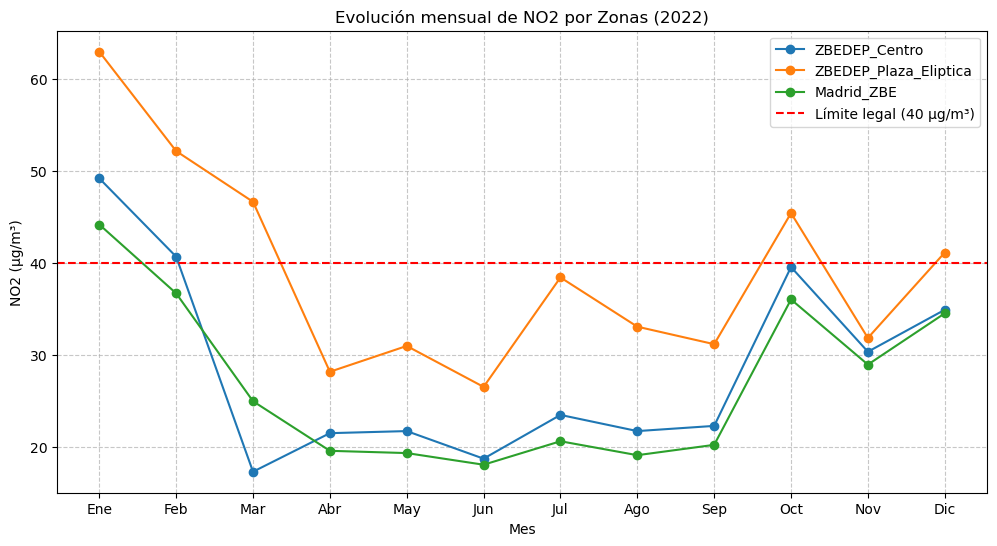

In [24]:
def visualizar_no2_temporal(df):
    # Preparamos los datos igual que antes
    no2_data = df[df['MAGNITUD'] == 8].copy()
    cols_valores = [f'D{str(i).zfill(2)}' for i in range(1, 32)]
    no2_data['NO2_MEDIO'] = no2_data[cols_valores].mean(axis=1)
    no2_data['ZONA_ZBE'] = no2_data['ESTACION'].map(lambda x: get_zona(f"{x} - {nombres_estaciones[x]}"))
    
    # Calculamos medias mensuales por zona
    medias_mensuales = no2_data.groupby(['ZONA_ZBE', 'MES'])['NO2_MEDIO'].mean().reset_index()
    
    # Creamos la gráfica
    plt.figure(figsize=(12, 6))
    
    # Una línea por cada zona
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        datos_zona = medias_mensuales[medias_mensuales['ZONA_ZBE'] == zona]
        plt.plot(datos_zona['MES'], datos_zona['NO2_MEDIO'], marker='o', label=zona)
    
    # Añadimos línea del límite legal
    plt.axhline(y=40, color='r', linestyle='--', label='Límite legal (40 µg/m³)')
    
    # Configuramos la gráfica
    plt.title('Evolución mensual de NO2 por Zonas (2022)')
    plt.xlabel('Mes')
    plt.ylabel('NO2 (µg/m³)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    
    plt.show()

# Ejecutamos la visualización
visualizar_no2_temporal(df_2022)

El análisis por meses de los niveles de NO2 en Madrid durante 2022 revela patrones estacionales claros y diferencias significativas entre las distintas Zonas de Bajas Emisiones.

Los niveles más altos se registran durante el periodo invernal, especialmente en diciembre y enero, donde todas las zonas muestran picos significativos. Esto puede atribuirse a una combinación de factores: mayor tráfico por actividades navideñas, uso intensivo de calefacciones y condiciones meteorológicas que dificultan la dispersión de contaminantes.

La primavera marca un punto de inflexión con una notable reducción en los niveles de NO2 en todas las zonas, posiblemente debido a las lluvias más frecuentes que limpian la atmósfera y a temperaturas más suaves que reducen el uso de calefacciones.

Durante el verano se observa un patrón interesante: un ligero repunte en junio-julio, posiblemente relacionado con el aumento del turismo y el uso de aire acondicionado, seguido de una significativa reducción en agosto coincidiendo con el periodo vacacional.

La ZBEDEP Plaza Elíptica destaca como la zona más problemática, manteniendo consistentemente niveles más altos que las otras zonas durante todo el año y superando con frecuencia el límite legal de 40 µg/m³. En contraste, tanto la ZBEDEP Centro como la Madrid ZBE muestran patrones similares entre sí, con excesos puntuales en invierno pero manteniéndose generalmente por debajo del límite legal durante el resto del año.

El retorno a la actividad tras el periodo estival marca otro punto crítico, con un aumento notable en los niveles de NO2 durante septiembre y octubre, evidenciando la fuerte correlación entre la actividad urbana (especialmente el tráfico relacionado con el trabajo y la vuelta al cole) y los niveles de contaminación.

### 2.1.2. Análisis "laboral/fin de semana" del NO2 por Zonas

In [27]:
def transformar_a_diario_no2(df):
    # Filtramos NO2
    no2_data = df[df['MAGNITUD'] == 8].copy()
    # Pasamos de formato ancho a largo
    df_long = no2_data.melt(
        id_vars=['ESTACION', 'ANO', 'MES'],
        value_vars=[f'D{str(i).zfill(2)}' for i in range(1, 32)],
        var_name='DIA',
        value_name='NO2'
    )
    # Quitamos valores vacíos o nulos
    df_long = df_long.dropna(subset=['NO2'])
    # Convertimos a numérico
    df_long['NO2'] = pd.to_numeric(df_long['NO2'], errors='coerce')
    # Extraemos el número de día
    df_long['DIA'] = df_long['DIA'].str.extract('D(\d+)').astype(int)
    # Creamos la fecha real
    df_long['FECHA'] = pd.to_datetime(df_long['ANO'].astype(str) + '-' + df_long['MES'].astype(str) + '-' + df_long['DIA'].astype(str), errors='coerce')
    # Añadimos zona
    df_long['ZONA_ZBE'] = df_long['ESTACION'].map(lambda x: get_zona(f"{x} - {nombres_estaciones[x]}"))
    return df_long

# Transformamos el dataframe
no2_diario = transformar_a_diario_no2(df_2022)

# Ahora sí, análisis laborable/fin de semana
def analisis_laboral_festivo_no2_diario(df_long):
    df_long['ES_LABORAL'] = df_long['FECHA'].dt.dayofweek < 5
    print("Análisis NO2 - Días Laborables vs Fin de Semana:")
    print("-" * 50)
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        datos_zona = df_long[df_long['ZONA_ZBE'] == zona]
        media_laboral = datos_zona[datos_zona['ES_LABORAL']]['NO2'].mean()
        media_finde = datos_zona[~datos_zona['ES_LABORAL']]['NO2'].mean()
        print(f"\nZona: {zona}")
        print(f"Media días laborables: {media_laboral:.1f} µg/m³")
        print(f"Media fin de semana: {media_finde:.1f} µg/m³")
        print(f"Diferencia: {media_laboral - media_finde:.1f} µg/m³")

analisis_laboral_festivo_no2_diario(no2_diario)

Análisis NO2 - Días Laborables vs Fin de Semana:
--------------------------------------------------

Zona: ZBEDEP_Centro
Media días laborables: 28.4 µg/m³
Media fin de semana: 23.5 µg/m³
Diferencia: 4.9 µg/m³

Zona: ZBEDEP_Plaza_Eliptica
Media días laborables: 41.0 µg/m³
Media fin de semana: 34.6 µg/m³
Diferencia: 6.5 µg/m³

Zona: Madrid_ZBE
Media días laborables: 28.9 µg/m³
Media fin de semana: 22.3 µg/m³
Diferencia: 6.6 µg/m³


El análisis de los niveles de NO2 en días laborables y fines de semana en las Zonas de Bajas
Emisiones de Madrid durante 2022 muestra una reducción clara de la contaminación en fin de semana, 
aunque menos pronunciada de lo esperado si solo influyera el tráfico laboral. 

En todas las zonas, la media de NO2 es mayor en días laborables, pero la diferencia es moderada: 4,9 µg/m³ 
en ZBEDEP Centro, 6,5 µg/m³ en Plaza Elíptica y 6,6 µg/m³ en el resto de Madrid.

Esto indica que, además del tráfico laboral, otros factores como la llegada de visitantes de la periferia, el turismo 
y las actividades de ocio (conciertos, paridos...) mantienen la contaminación relativamente alta los fines de semana. 

Las políticas de calidad del aire deben considerar no solo el tráfico de lunes a viernes, sino también el impacto del ocio y los desplazamientos metropolitanos en la ciudad.

### 2.1.3. Análisis "Efecto Frontera" para el NO2

Queremos comprobar si los límites administrativos de las ZBE realmente marcan una diferencia en la calidad del aire o si, por el contrario, la contaminación se "desplaza" a las zonas limítrofes, generando un gradiente o incluso un aumento fuera de la zona restringida.

Para ello seleccionaremos estaciones que estén dentro y fuera de las ZBEDEP (Centro y Plaza Elíptica) y compararemos su medias de NO2 y su evolución temporal

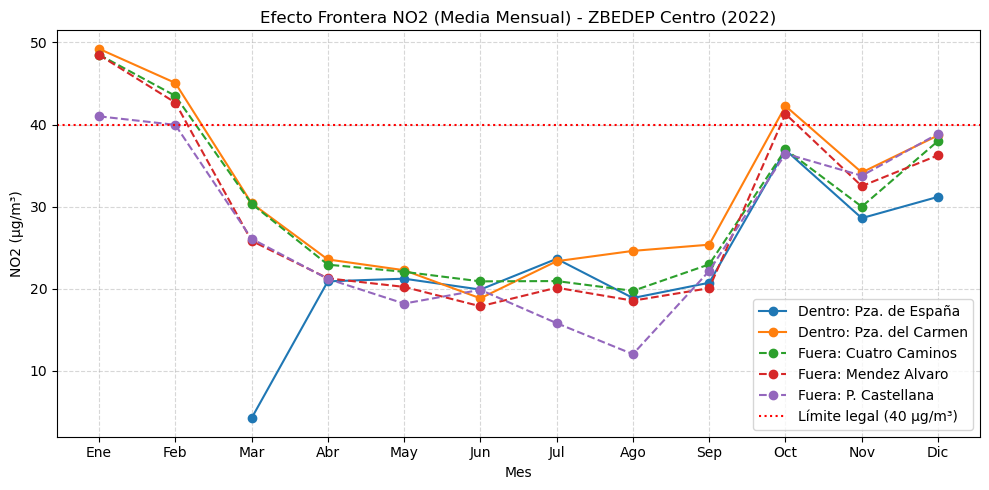

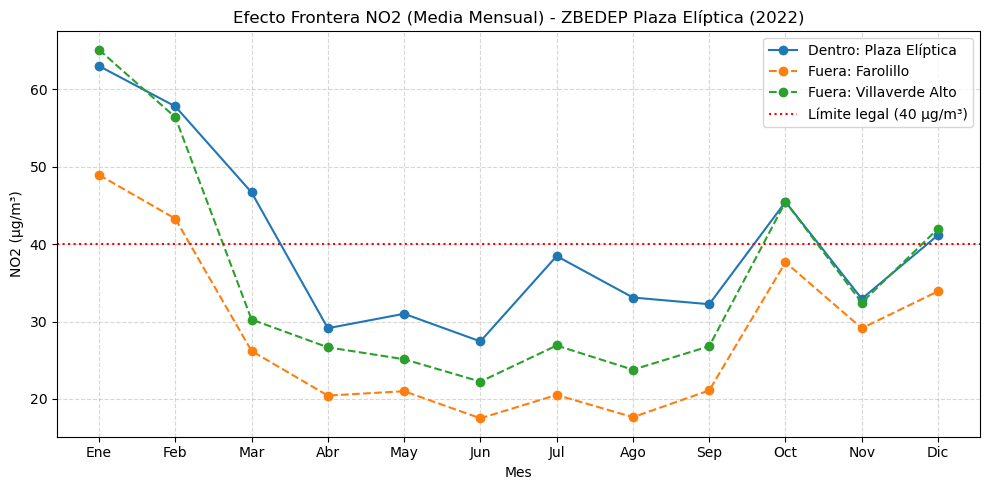

In [30]:
# Seleccionamos las estaciones limítrofes
estaciones_centro_dentro = [4, 35]
estaciones_centro_fuera = [38, 47, 48]
estaciones_eliptica_dentro = [56]
estaciones_eliptica_fuera = [18, 17]

# Usamos el dataframe diario que ya creamos antes: no2_diario

import matplotlib.pyplot as plt

def comparar_efecto_frontera_mensual(no2_diario, estaciones_dentro, estaciones_fuera, nombre_zbe):
    plt.figure(figsize=(10, 5))
    # Dentro
    for est in estaciones_dentro:
        datos = no2_diario[no2_diario['ESTACION'] == est].copy()
        datos['MES'] = datos['FECHA'].dt.month
        media_mensual = datos.groupby('MES')['NO2'].mean()
        plt.plot(media_mensual.index, media_mensual.values, marker='o', label=f'Dentro: {nombres_estaciones[est]}')
    # Fuera
    for est in estaciones_fuera:
        datos = no2_diario[no2_diario['ESTACION'] == est].copy()
        datos['MES'] = datos['FECHA'].dt.month
        media_mensual = datos.groupby('MES')['NO2'].mean()
        plt.plot(media_mensual.index, media_mensual.values, marker='o', linestyle='--', label=f'Fuera: {nombres_estaciones[est]}')
    plt.axhline(y=40, color='r', linestyle=':', label='Límite legal (40 µg/m³)')
    plt.title(f'Efecto Frontera NO2 (Media Mensual) - {nombre_zbe} (2022)')
    plt.xlabel('Mes')
    plt.ylabel('NO2 (µg/m³)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    plt.tight_layout()
    plt.show()

# ZBEDEP Centro
comparar_efecto_frontera_mensual(no2_diario, estaciones_centro_dentro, estaciones_centro_fuera, "ZBEDEP Centro")

# ZBEDEP Plaza Elíptica
comparar_efecto_frontera_mensual(no2_diario, estaciones_eliptica_dentro, estaciones_eliptica_fuera, "ZBEDEP Plaza Elíptica")

El análisis del “efecto frontera” en los niveles de NO2 alrededor de las Zonas de Bajas Emisiones (ZBE) 
de Madrid muestra resultados diferentes según la zona analizada. 

En el caso de la ZBEDEP Centro, las estaciones situadas dentro y fuera de la zona presentan valores de NO2 muy similares a lo 
largo de todo el año. No se observa un salto claro en la concentración de contaminante al cruzar 
el límite de la ZBE, lo que sugiere que, al menos en las estaciones seleccionadas, la delimitación administrativa 
no genera una mejora significativa de la calidad del aire en el interior respecto a las zonas colindantes.

Por el contrario, en la ZBEDEP Plaza Elíptica sí se aprecia un gradiente claro: la estación situada dentro de la zona (Plaza Elíptica) registra valores de NO2 notablemente superiores a los de las estaciones limítrofes exteriores (Farolillo y Villaverde Alto) durante todo el año. Esto indica que, en este caso, la ZBE coincide con un área especialmente problemática en términos de contaminación, y que la diferencia entre el interior y el exterior es significativa.

En resumen, el efecto frontera no es homogéneo en todas las ZBE de Madrid. Mientras que en el Centro la diferencia entre dentro y fuera es mínima, en Plaza Elíptica la frontera sí marca un cambio claro en los niveles de NO2. Este hallazgo pone de manifiesto la importancia de analizar cada zona de manera individual y cuestiona la eficacia de los límites administrativos como única herramienta para mejorar la calidad del aire.

### 2.1.4 Conclusiones análisis del NO2
El análisis detallado del NO2 en Madrid durante 2022 nos ha permitido identificar patrones estacionales, 
diferencias entre días laborables y fines de semana, y evaluar el impacto real de las Zonas de Bajas Emisiones 
tanto en su interior como en las zonas limítrofes. 

Hemos comprobado que, aunque existe una reducción de la contaminación en fin de semana y ciertas diferencias entre zonas, 
el efecto frontera no es homogéneo en toda la ciudad y depende mucho de la localización y características de cada área.

Estos resultados subrayan la importancia de analizar cada contaminante y cada zona de manera individual para comprender mejor la dinámica de la calidad del aire en Madrid. Por ello, a continuación, aplicaremos una metodología similar para estudiar el comportamiento de otro contaminante clave: las partículas en suspensión PM10.

## 2.2 Análisis de PM10 (Partículas en Suspensión ≤ 10 micras)

### Contexto y Relevancia

Las partículas en suspensión PM10 son uno de los contaminantes atmosféricos más relevantes en entornos urbanos. Su pequeño tamaño les permite penetrar en el sistema respiratorio, afectando especialmente a personas con problemas respiratorios, niños y ancianos. Además, están sujetas a normativa europea (límite anual: 40 µg/m³) y su presencia está relacionada tanto con el tráfico rodado como con otras fuentes (construcción, polvo, calefacciones, etc.). No todas las estaciones miden PM10, pero su análisis es fundamental para evaluar la calidad del aire y el impacto de las Zonas de Bajas Emisiones.

### Objetivos Específicos

1. Comparar niveles de PM10 entre diferentes tipos de ZBE:
   - ZBEDEP Centro (2 estaciones)
   - ZBEDEP Plaza Elíptica (1 estación)
   - Madrid ZBE (21 estaciones)
2. Analizar patrones temporales:
   - Variación diaria
   - Diferencias laborable/fin de semana
   - Tendencias mensuales
3. Evaluar "efecto frontera":
   - Comparación con estaciones limítrofes
   - Gradientes de concentración

### Metodología

1. Análisis estadístico descriptivo por zonas
2. Visualización de patrones temporales
3. Análisis comparativo dentro/fuera de ZBE
4. Evaluación de cumplimiento normativo

In [34]:
def transformar_a_diario_pm10(df):
    # Filtramos PM10 (MAGNITUD = 10)
    pm10_data = df[df['MAGNITUD'] == 10].copy()
    # Pasamos de formato ancho a largo
    df_long = pm10_data.melt(
        id_vars=['ESTACION', 'ANO', 'MES'],
        value_vars=[f'D{str(i).zfill(2)}' for i in range(1, 32)],
        var_name='DIA',
        value_name='PM10'
    )
    # Quitamos valores vacíos o nulos
    df_long = df_long.dropna(subset=['PM10'])
    # Convertimos a numérico
    df_long['PM10'] = pd.to_numeric(df_long['PM10'], errors='coerce')
    # Extraemos el número de día
    df_long['DIA'] = df_long['DIA'].str.extract('D(\d+)').astype(int)
    # Creamos la fecha real
    df_long['FECHA'] = pd.to_datetime(df_long['ANO'].astype(str) + '-' + df_long['MES'].astype(str) + '-' + df_long['DIA'].astype(str), errors='coerce')
    # Añadimos zona
    df_long['ZONA_ZBE'] = df_long['ESTACION'].map(lambda x: get_zona(f"{x} - {nombres_estaciones[x]}"))
    return df_long

# Transformamos el dataframe
pm10_diario = transformar_a_diario_pm10(df_2022)

# Vemos una muestra para comprobar
print(pm10_diario.head())

   ESTACION   ANO  MES  DIA  PM10      FECHA    ZONA_ZBE
0         8  2022    1    1  16.0 2022-01-01  Madrid_ZBE
1         8  2022    2    1   7.0 2022-02-01  Madrid_ZBE
2         8  2022    3    1  17.0 2022-03-01  Madrid_ZBE
3         8  2022    4    1   6.0 2022-04-01  Madrid_ZBE
4         8  2022    5    1  29.0 2022-05-01  Madrid_ZBE


### 2.2.1. Análisis mensual del PM10 por Zonas

In [36]:
def analisis_mensual_pm10(pm10_diario):
    print("Análisis mensual de PM10 por Zonas (2022):")
    print("-" * 50)
    meses = {1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo', 
             6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre', 
             10:'Octubre', 11:'Noviembre', 12:'Diciembre'}
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        print(f"\nZona: {zona}")
        medias_mensuales = pm10_diario[pm10_diario['ZONA_ZBE'] == zona].groupby('MES')['PM10'].agg([
            ('Media PM10 (µg/m³)', lambda x: round(x.mean(), 1)),
            ('% Días > 40 µg/m³', lambda x: round((x > 40).mean() * 100, 0))
        ])
        medias_mensuales.index = medias_mensuales.index.map(meses)
        print(medias_mensuales)

analisis_mensual_pm10(pm10_diario)

Análisis mensual de PM10 por Zonas (2022):
--------------------------------------------------

Zona: ZBEDEP_Centro
Empty DataFrame
Columns: [Media PM10 (µg/m³), % Días > 40 µg/m³]
Index: []

Zona: ZBEDEP_Plaza_Eliptica
            Media PM10 (µg/m³)  % Días > 40 µg/m³
MES                                              
Enero                     15.0                0.0
Febrero                   13.7                0.0
Marzo                     17.0                6.0
Abril                     14.0                0.0
Mayo                      24.2                6.0
Junio                     29.1               19.0
Julio                     37.2               26.0
Agosto                    34.3               23.0
Septiembre                21.3               10.0
Octubre                   33.8               26.0
Noviembre                 10.0                0.0
Diciembre                 14.2                0.0

Zona: Madrid_ZBE
            Media PM10 (µg/m³)  % Días > 40 µg/m³
MES          

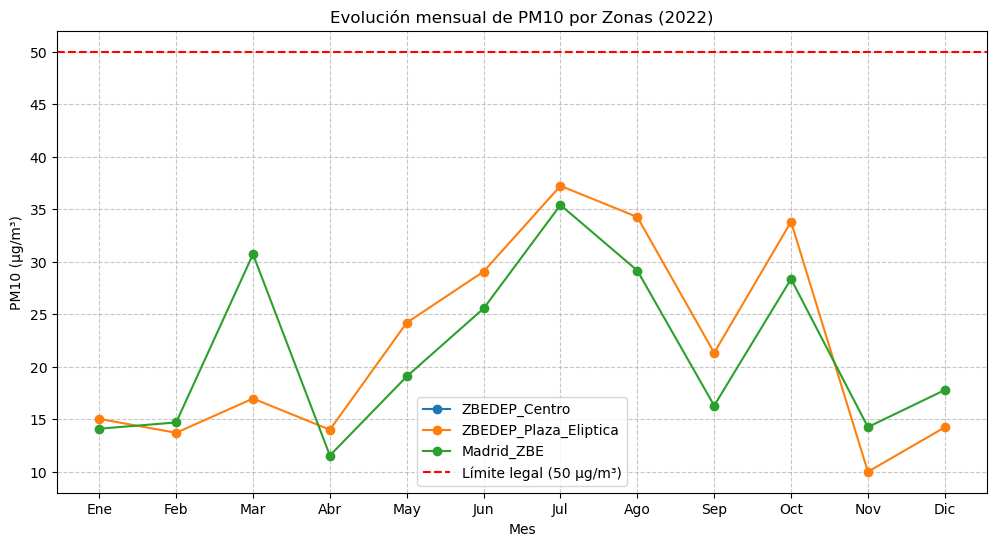

In [37]:
def visualizar_pm10(df):
    # 1. Filtramos datos de PM10
    pm10_data = df[df['MAGNITUD'] == 10].copy()
    
    # 2. Calculamos medias diarias por zona y mes
    cols_valores = [f'D{str(i).zfill(2)}' for i in range(1, 32)]
    pm10_data['PM10_MEDIO'] = pm10_data[cols_valores].mean(axis=1)
    pm10_data['ZONA_ZBE'] = pm10_data['ESTACION'].map(lambda x: get_zona(f"{x} - {nombres_estaciones[x]}"))
    
    # 3. Calculamos las medias mensuales
    medias_mensuales = pm10_data.groupby(['ZONA_ZBE', 'MES'])['PM10_MEDIO'].mean().reset_index()
    
    # 4. Creamos la gráfica
    plt.figure(figsize=(12, 6))
    
    # Una línea por cada zona
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        datos_zona = medias_mensuales[medias_mensuales['ZONA_ZBE'] == zona]
        plt.plot(datos_zona['MES'], datos_zona['PM10_MEDIO'], marker='o', label=zona)
    
    # Añadimos línea del límite legal
    plt.axhline(y=50, color='r', linestyle='--', label='Límite legal (50 µg/m³)')
    
    # Configuramos la gráfica
    plt.title('Evolución mensual de PM10 por Zonas (2022)')
    plt.xlabel('Mes')
    plt.ylabel('PM10 (µg/m³)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    
    plt.show()

# Ejecutamos la visualización
visualizar_pm10(df_2022)

El análisis mensual de las concentraciones de PM10 en Madrid durante 2022 muestra un comportamiento 
estacional diferente al del NO2, con valores más altos en verano y otoño. Este aumento se debe principalmente 
a la mayor sequedad ambiental, la escasez de lluvias y la suspensión de polvo, factores que favorecen la a
cumulación de partículas en suspensión. Durante estos meses son más frecuentes los episodios de intrusión 
de polvo sahariano, que pueden elevar de forma significativa los niveles de PM10 en toda la península.

Destaca especialmente el pico registrado en marzo, sobre todo en la estación de Plaza Elíptica. Este aumento 
excepcional no se debe a factores locales como el tráfico o la actividad urbana, sino a un episodio extraordinario 
de intrusión de polvo sahariano que afectó a toda la Península Ibérica entre el 14 y el 16 de marzo de 2022.

Durante esos días, una borrasca denominada Celia y una DANA (depresión aislada en niveles altos) favorecieron
la llegada masiva de polvo del desierto del Sahara, elevando de forma drástica las concentraciones de partículas 
en suspensión (PM10) en Madrid y en muchas otras ciudades españolas. Este fenómeno, conocido como calima, fue a
mpliamente documentado por la Agencia Estatal de Meteorología (AEMET), que lo calificó como uno de los episodios 
más intensos de los últimos años, con valores de PM10 que en algunas estaciones de fondo superaron los 1000 µg/m³,
muy por encima de los límites legales y de los valores habituales para la época.

(https://aemetblog.es/2022/04/16/informe-acerca-de-la-intrusion-de-polvo-de-origen-sahariano-sobre-el-territorio-peninsular-espanol-entre-los-dias-14-y-16-de-marzo-de-2022/)


El pico de PM10 observado en marzo de 2022 debe interpretarse como consecuencia de un evento meteorológico excepcional 
y no como un fallo de las políticas locales de calidad del aire. Este tipo de episodios, aunque poco frecuentes, tienen 
un gran impacto en los datos anuales y deben ser tenidos en cuenta tanto en el análisis como en la modelización y en la 
elaboración de recomendaciones de salud pública.

### 2.2.2. Análisis laboral/fin de semana del PM10 por Zonas

In [40]:
def analisis_laboral_festivo_pm10(df):
    df['ES_LABORAL'] = df['FECHA'].dt.dayofweek < 5
    print("Análisis PM10 - Días Laborables vs Fin de Semana:")
    print("-" * 50)
    for zona in ['ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        datos_zona = df[df['ZONA_ZBE'] == zona]
        media_laboral = datos_zona[datos_zona['ES_LABORAL']]['PM10'].mean()
        media_finde = datos_zona[~datos_zona['ES_LABORAL']]['PM10'].mean()
        print(f"\nZona: {zona}")
        print(f"Media días laborables: {media_laboral:.1f} µg/m³")
        print(f"Media fin de semana: {media_finde:.1f} µg/m³")
        print(f"Diferencia: {media_laboral - media_finde:.1f} µg/m³")

analisis_laboral_festivo_pm10(pm10_diario)

Análisis PM10 - Días Laborables vs Fin de Semana:
--------------------------------------------------

Zona: ZBEDEP_Plaza_Eliptica
Media días laborables: 22.8 µg/m³
Media fin de semana: 20.1 µg/m³
Diferencia: 2.7 µg/m³

Zona: Madrid_ZBE
Media días laborables: 22.8 µg/m³
Media fin de semana: 18.3 µg/m³
Diferencia: 4.5 µg/m³


El análisis de las concentraciones de PM10 en días laborables y fines de semana durante 2022 
muestra que los niveles de partículas en suspensión son ligeramente más altos en los días laborables.

Estas diferencias son menores que las observadas para el NO2, lo que confirma que el tráfico y la actividad laboral, 
aunque influyen en los niveles de PM10, no son determinantes. El PM10 incluye partículas de muy diversa procedencia, 
como polvo, polen, partículas de desgaste de neumáticos y frenos, y, especialmente en los meses cálidos, polvo en suspensión 
de origen sahariano. Es por esto que los patrones temporales y estacionales del PM10 difieren de los del NO2, 
mostrando picos en verano y otoño más relacionados con condiciones meteorológicas y ambientales que con la actividad urbana.

### 2.2.3. Análisis "Efecto Frontera" del PM10 por Zonas

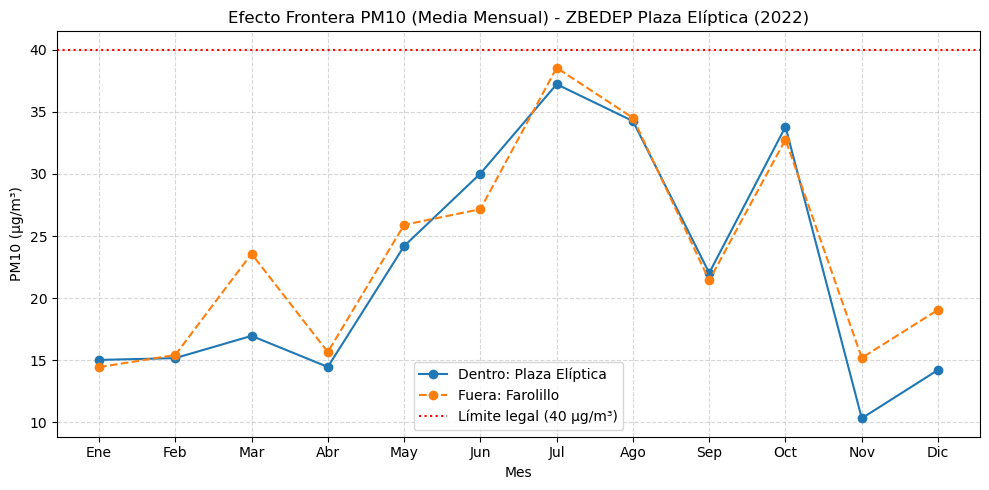


Diferencia media anual entre Plaza Elíptica (dentro) y Farolillo (fuera):
-1.32 µg/m³


In [43]:
def comparar_efecto_frontera_pm10(pm10_diario):
    plt.figure(figsize=(10, 5))
    
    # Estaciones a comparar
    estacion_dentro = 56  # Plaza Elíptica
    estacion_fuera = 18   # Farolillo
    
    # Dentro
    datos_dentro = pm10_diario[pm10_diario['ESTACION'] == estacion_dentro].copy()
    datos_dentro['MES'] = datos_dentro['FECHA'].dt.month
    media_mensual_dentro = datos_dentro.groupby('MES')['PM10'].mean()
    plt.plot(media_mensual_dentro.index, media_mensual_dentro.values, marker='o', 
             label=f'Dentro: {nombres_estaciones[estacion_dentro]}')
    
    # Fuera
    datos_fuera = pm10_diario[pm10_diario['ESTACION'] == estacion_fuera].copy()
    datos_fuera['MES'] = datos_fuera['FECHA'].dt.month
    media_mensual_fuera = datos_fuera.groupby('MES')['PM10'].mean()
    plt.plot(media_mensual_fuera.index, media_mensual_fuera.values, marker='o', 
             linestyle='--', label=f'Fuera: {nombres_estaciones[estacion_fuera]}')
    
    plt.axhline(y=40, color='r', linestyle=':', label='Límite legal (40 µg/m³)')
    plt.title('Efecto Frontera PM10 (Media Mensual) - ZBEDEP Plaza Elíptica (2022)')
    plt.xlabel('Mes')
    plt.ylabel('PM10 (µg/m³)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    plt.tight_layout()
    plt.show()
    
    # Calculamos diferencias medias
    print("\nDiferencia media anual entre Plaza Elíptica (dentro) y Farolillo (fuera):")
    diff_anual = datos_dentro['PM10'].mean() - datos_fuera['PM10'].mean()
    print(f"{diff_anual:.2f} µg/m³")

comparar_efecto_frontera_pm10(pm10_diario)

En el gráfico podemos ver como hay una casi total ausencia de un efecto forntera para el PM10 con patrones mensuales muy similares para ambas estaciones. Este comportamiento confirma los patrones de dispersión más amplios y la mayor influencia de fuentes naturales y/o antropogénicas (como meteorológicas) sobre el PM10 que el tráfico local.

### 2.2.4. Conclusiones del análisis del PM10
El análisis del PM10 en Madrid durante 2022 revela patrones estacionales marcados, con picos en verano y otoño, 
comunes tanto dentro como fuera de las ZBE. 
A diferencia del NO2, no se observa un efecto frontera significativo para este contaminante.

Esta homogeneidad espacial del PM10 demuestra que las partículas en suspensión tienen patrones de dispersión más amplios y menos localizados, lo que sugiere que las estrategias de control deberían considerar un enfoque más regional, complementario a las restricciones zonales de tráfico que son más efectivas para el NO2.

## 2.3 Análisis de PM2.5 (Partículas finas en suspensión ≤ 2.5 micras)

### Contexto y Relevancia

Las partículas finas PM2.5 son especialmente peligrosas para la salud por su capacidad de penetrar profundamente en el sistema respiratorio y llegar al torrente sanguíneo. Son un contaminante prioritario desde el punto de vista sanitario, con valores límite más estrictos que el PM10: 25 µg/m³ como media anual según la normativa europea actual, y 5 µg/m³ según las recomendaciones de la OMS de 2021. Su origen incluye la combustión de combustibles fósiles, procesos industriales y formación secundaria en la atmósfera.


### Objetivos Específicos

1. Comparar niveles de PM2.5 entre diferentes tipos de ZBE:
   - ZBEDEP Centro (verificar estaciones con medición)
   - ZBEDEP Plaza Elíptica (verificar estaciones con medición)
   - Madrid ZBE (resto de estaciones con medición)
2. Analizar patrones temporales:
   - Variación diaria
   - Diferencias laborable/fin de semana
   - Tendencias mensuales
3. Evaluar "efecto frontera":
   - Comparación con estaciones limítrofes
   - Gradientes de concentración

### Metodología

1. Análisis estadístico descriptivo por zonas
2. Visualización de patrones temporales
3. Análisis comparativo dentro/fuera de ZBE
4. Evaluación de cumplimiento normativo

### 2.3.1 Análisis mensual del PM2.5 por Zonas

In [48]:
def transformar_a_diario_pm25(df):
    # Filtramos PM2.5 (MAGNITUD = 9)
    pm25_data = df[df['MAGNITUD'] == 9].copy()
    # Pasamos de formato ancho a largo
    df_long = pm25_data.melt(
        id_vars=['ESTACION', 'ANO', 'MES'],
        value_vars=[f'D{str(i).zfill(2)}' for i in range(1, 32)],
        var_name='DIA',
        value_name='PM25'
    )
    # Quitamos valores vacíos o nulos
    df_long = df_long.dropna(subset=['PM25'])
    # Convertimos a numérico
    df_long['PM25'] = pd.to_numeric(df_long['PM25'], errors='coerce')
    # Extraemos el número de día
    df_long['DIA'] = df_long['DIA'].str.extract('(\d+)').astype(int)
    # Creamos la fecha real
    df_long['FECHA'] = pd.to_datetime(df_long['ANO'].astype(str) + '-' + df_long['MES'].astype(str) + '-' + df_long['DIA'].astype(str), errors='coerce')
    # Añadimos zona
    df_long['ZONA_ZBE'] = df_long['ESTACION'].map(lambda x: get_zona(f"{x} - {nombres_estaciones[x]}"))
    return df_long

pm25_diario = transformar_a_diario_pm25(df_2022)

In [49]:
def analisis_mensual_pm25(pm25_diario):
    print("Análisis mensual de PM2.5 por Zonas (2022):")
    print("-" * 50)
    meses = {1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo',
             6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre',
             10:'Octubre', 11:'Noviembre', 12:'Diciembre'}
    
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        print(f"\nZona: {zona}")
        medias_mensuales = pm25_diario[pm25_diario['ZONA_ZBE'] == zona].groupby('MES')['PM25'].agg([
            ('Media PM2.5 (µg/m³)', lambda x: round(x.mean(), 1)),
            ('% Días > 25 µg/m³', lambda x: round((x > 25).mean() * 100, 0))
        ])
        # Añadimos nombres de meses
        medias_mensuales.index = medias_mensuales.index.map(meses)
        print(medias_mensuales)

# Ejecutamos el análisis
analisis_mensual_pm25(pm25_diario)

Análisis mensual de PM2.5 por Zonas (2022):
--------------------------------------------------

Zona: ZBEDEP_Centro
Empty DataFrame
Columns: [Media PM2.5 (µg/m³), % Días > 25 µg/m³]
Index: []

Zona: ZBEDEP_Plaza_Eliptica
            Media PM2.5 (µg/m³)  % Días > 25 µg/m³
MES                                               
Enero                      11.3                0.0
Febrero                     8.4                0.0
Marzo                       7.8                3.0
Abril                       7.9                0.0
Mayo                       10.9                0.0
Junio                      11.3               10.0
Julio                      19.6               16.0
Agosto                     16.1               16.0
Septiembre                 11.4               13.0
Octubre                    15.6               10.0
Noviembre                   5.5                0.0
Diciembre                   8.6                0.0

Zona: Madrid_ZBE
            Media PM2.5 (µg/m³)  % Días > 25 µg

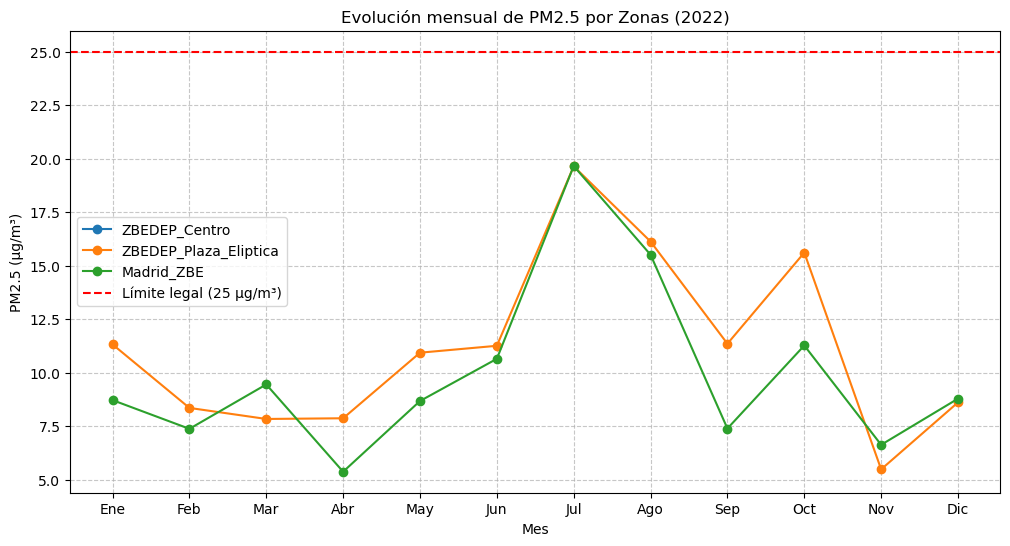

In [50]:
def visualizar_pm25_temporal(df):
    # 1. Filtramos datos de PM2.5
    pm25_data = df[df['MAGNITUD'] == 9].copy()
    
    # 2. Calculamos medias diarias por zona y mes
    cols_valores = [f'D{str(i).zfill(2)}' for i in range(1, 32)]
    pm25_data['PM25_MEDIO'] = pm25_data[cols_valores].mean(axis=1)
    pm25_data['ZONA_ZBE'] = pm25_data['ESTACION'].map(lambda x: get_zona(f"{x} - {nombres_estaciones[x]}"))
    
    # 3. Calculamos las medias mensuales
    medias_mensuales = pm25_data.groupby(['ZONA_ZBE', 'MES'])['PM25_MEDIO'].mean().reset_index()
    
    # 4. Creamos la gráfica
    plt.figure(figsize=(12, 6))
    
    # Una línea por cada zona
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        datos_zona = medias_mensuales[medias_mensuales['ZONA_ZBE'] == zona]
        plt.plot(datos_zona['MES'], datos_zona['PM25_MEDIO'], marker='o', label=zona)
    
    # Añadimos línea del límite legal
    plt.axhline(y=25, color='r', linestyle='--', label='Límite legal (25 µg/m³)')
    
    # Configuramos la gráfica
    plt.title('Evolución mensual de PM2.5 por Zonas (2022)')
    plt.xlabel('Mes')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    
    plt.show()

# Ejecutamos la visualización
visualizar_pm25_temporal(df_2022)

Evolución anual:
Los valores medios de PM2.5 en Plaza Elíptica y Madrid_ZBE son bajos la mayor parte del año, pero aumentan notablemente en los meses de verano (julio y agosto), donde también se observa un mayor porcentaje de días que superan el límite legal de 25 µg/m³.
El resto del año, los valores se mantienen por debajo del umbral legal y con poca variabilidad.

Principales causas del aumento de PM2.5 en verano:
- Altas temperaturas:
Favorecen reacciones químicas que generan partículas finas y aumentan la formación de aerosoles secundarios.
- Incendios forestales:
Más frecuentes e intensos en verano, liberan humo y cenizas que incrementan el PM2.5.
- Llegada de polvo del desierto:
Episodios de viento del sur pueden traer polvo sahariano, elevando los niveles de partículas en el aire.
- Mayor actividad humana:
Gran aumento del uso del aire acondicionado en hogares y oficinas.
- Estancamiento del aire:
Las olas de calor y la falta de viento dificultan la dispersión de contaminantes, acumulando más PM2.5.

### 2.3.2. Análisis laboral/fin de semana del PM2.5 por Zonas

In [53]:
def transformar_a_diario_pm25(df):
    # Filtramos PM2.5 (MAGNITUD = 9)
    pm25_data = df[df['MAGNITUD'] == 9].copy()
    # Pasamos de formato ancho a largo
    df_long = pm25_data.melt(
        id_vars=['ESTACION', 'ANO', 'MES'],
        value_vars=[f'D{str(i).zfill(2)}' for i in range(1, 32)],
        var_name='DIA',
        value_name='PM25'
    )
    # Quitamos valores vacíos o nulos
    df_long = df_long.dropna(subset=['PM25'])
    # Convertimos a numérico
    df_long['PM25'] = pd.to_numeric(df_long['PM25'], errors='coerce')
    # Extraemos el número de día
    df_long['DIA'] = df_long['DIA'].str.extract('(\d+)').astype(int)
    # Creamos la fecha real
    df_long['FECHA'] = pd.to_datetime(df_long['ANO'].astype(str) + '-' + df_long['MES'].astype(str) + '-' + df_long['DIA'].astype(str), errors='coerce')
    # Añadimos zona
    df_long['ZONA_ZBE'] = df_long['ESTACION'].map(lambda x: get_zona(f"{x} - {nombres_estaciones[x]}"))
    return df_long

pm25_diario = transformar_a_diario_pm25(df_2022)

In [54]:
def analisis_laboral_festivo_pm25(pm25_diario):
    pm25_diario['ES_LABORAL'] = pm25_diario['FECHA'].dt.dayofweek < 5
    print("Análisis PM2.5 – Días Laborables vs Fin de Semana:")
    print("-" * 50)
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        datos_zona = pm25_diario[pm25_diario['ZONA_ZBE'] == zona]
        media_laboral = datos_zona[datos_zona['ES_LABORAL']]['PM25'].mean()
        media_finde = datos_zona[~datos_zona['ES_LABORAL']]['PM25'].mean()
        print(f"\nZona: {zona}")
        print(f"Media días laborables: {media_laboral:.1f} µg/m³")
        print(f"Media fin de semana: {media_finde:.1f} µg/m³")
        print(f"Diferencia: {media_laboral - media_finde:.1f} µg/m³")

analisis_laboral_festivo_pm25(pm25_diario)

Análisis PM2.5 – Días Laborables vs Fin de Semana:
--------------------------------------------------

Zona: ZBEDEP_Centro
Media días laborables: nan µg/m³
Media fin de semana: nan µg/m³
Diferencia: nan µg/m³

Zona: ZBEDEP_Plaza_Eliptica
Media días laborables: 11.4 µg/m³
Media fin de semana: 10.8 µg/m³
Diferencia: 0.5 µg/m³

Zona: Madrid_ZBE
Media días laborables: 10.2 µg/m³
Media fin de semana: 9.5 µg/m³
Diferencia: 0.7 µg/m³


La ZBEDEP_Centro no mide las partículas PM2.5. En cuanto a las otras dos zonas, las diferencias entre fin de semana
días laborables no son significativas debido a la propia naturaleza de las partículas menos condicionadas al tráfico rodado.

### 2.3.3. Análisis "Efecto Frontera" del PM2.5 

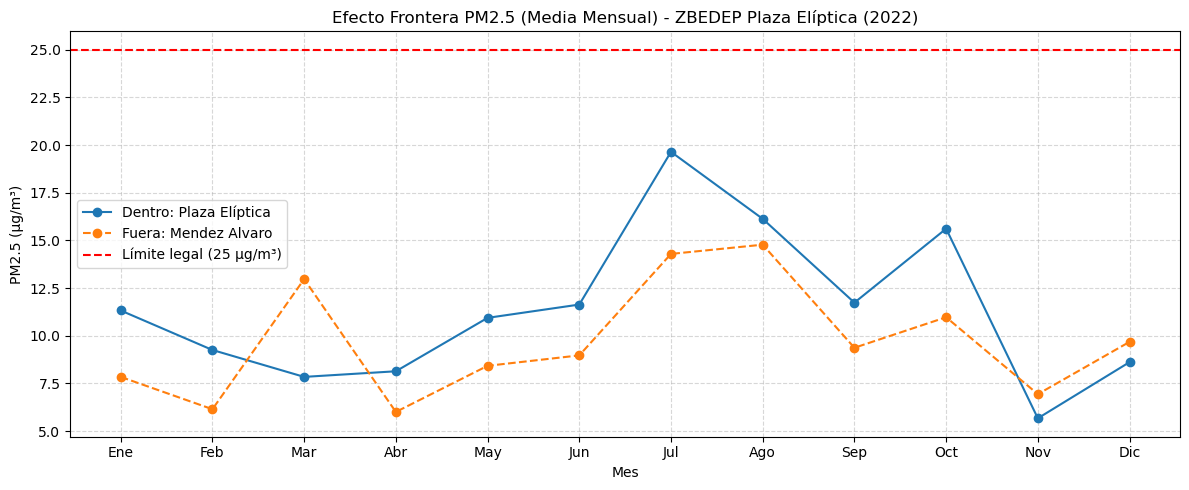

Diferencia media anual entre Plaza Elíptica (dentro) y Mendez Alvaro (fuera):
1.64 µg/m³


In [57]:
def comparar_efecto_frontera_pm25(pm25_diario):
    plt.figure(figsize=(12, 5))
    
    # Estaciones a comparar
    estacion_dentro = 56  # Plaza Elíptica
    estacion_fuera = 47   # Mendez Alvaro
    
    # Dentro
    datos_dentro = pm25_diario[pm25_diario['ESTACION'] == estacion_dentro].copy()
    datos_dentro['MES'] = datos_dentro['FECHA'].dt.month
    media_mensual_dentro = datos_dentro.groupby('MES')['PM25'].mean()
    plt.plot(media_mensual_dentro.index, media_mensual_dentro.values, marker='o', label=f'Dentro: {nombres_estaciones[estacion_dentro]}')
    
    # Fuera
    datos_fuera = pm25_diario[pm25_diario['ESTACION'] == estacion_fuera].copy()
    datos_fuera['MES'] = datos_fuera['FECHA'].dt.month
    media_mensual_fuera = datos_fuera.groupby('MES')['PM25'].mean()
    plt.plot(media_mensual_fuera.index, media_mensual_fuera.values, marker='o', linestyle='--', label=f'Fuera: {nombres_estaciones[estacion_fuera]}')
    
    # Línea límite legal
    plt.axhline(y=25, color='r', linestyle='--', label='Límite legal (25 µg/m³)')
    plt.title('Efecto Frontera PM2.5 (Media Mensual) - ZBEDEP Plaza Elíptica (2022)')
    plt.xlabel('Mes')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Diferencia media anual
    diff_anual = datos_dentro['PM25'].mean() - datos_fuera['PM25'].mean()
    print(f"Diferencia media anual entre {nombres_estaciones[estacion_dentro]} (dentro) y {nombres_estaciones[estacion_fuera]} (fuera):")
    print(f"{diff_anual:.2f} µg/m³")

comparar_efecto_frontera_pm25(pm25_diario)

El gráfico muestra que los valores de PM2.5 son algo más altos en Plaza Elíptica (dentro de la ZBEDEP) 
que en Méndez Álvaro (fuera), con una diferencia media anual de 1,64 µg/m³. Esta diferencia se mantiene a lo 
largo de todo el año, aunque ambos valores están por debajo del límite legal. El “efecto frontera” para PM2.5 
es moderado, pero se observa una mayor concentración dentro de la ZBEDEP Plaza Elíptica respecto a la estación
más próxima disponible fuera de la zona.

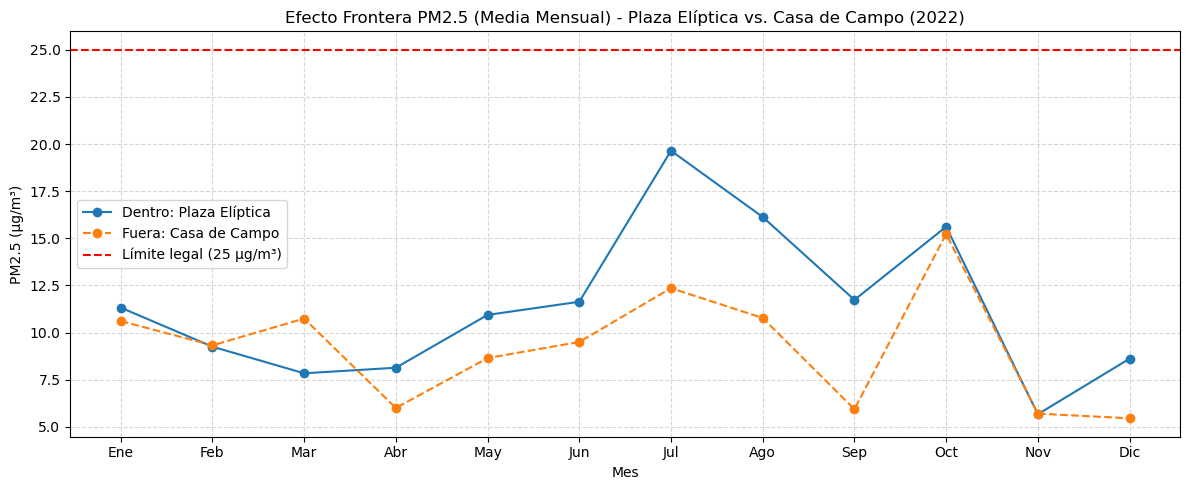

Diferencia media anual entre Plaza Elíptica (dentro) y Casa de Campo (fuera):
2.16 µg/m³


In [59]:
def comparar_efecto_frontera_pm25_casacampo(pm25_diario):
    plt.figure(figsize=(12, 5))
    
    # Estaciones a comparar
    estacion_dentro = 56  # Plaza Elíptica
    estacion_fuera = 24   # Casa de Campo
    
    # Dentro
    datos_dentro = pm25_diario[pm25_diario['ESTACION'] == estacion_dentro].copy()
    datos_dentro['MES'] = datos_dentro['FECHA'].dt.month
    media_mensual_dentro = datos_dentro.groupby('MES')['PM25'].mean()
    plt.plot(media_mensual_dentro.index, media_mensual_dentro.values, marker='o', label=f'Dentro: {nombres_estaciones[estacion_dentro]}')
    
    # Fuera
    datos_fuera = pm25_diario[pm25_diario['ESTACION'] == estacion_fuera].copy()
    datos_fuera['MES'] = datos_fuera['FECHA'].dt.month
    media_mensual_fuera = datos_fuera.groupby('MES')['PM25'].mean()
    plt.plot(media_mensual_fuera.index, media_mensual_fuera.values, marker='o', linestyle='--', label=f'Fuera: {nombres_estaciones[estacion_fuera]}')
    
    # Línea límite legal
    plt.axhline(y=25, color='r', linestyle='--', label='Límite legal (25 µg/m³)')
    plt.title('Efecto Frontera PM2.5 (Media Mensual) - Plaza Elíptica vs. Casa de Campo (2022)')
    plt.xlabel('Mes')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Diferencia media anual
    diff_anual = datos_dentro['PM25'].mean() - datos_fuera['PM25'].mean()
    print(f"Diferencia media anual entre {nombres_estaciones[estacion_dentro]} (dentro) y {nombres_estaciones[estacion_fuera]} (fuera):")
    print(f"{diff_anual:.2f} µg/m³")

comparar_efecto_frontera_pm25_casacampo(pm25_diario)

El gráfico muestra que los valores de PM2.5 son un poco más altos en Plaza Elíptica (dentro de la ZBEDEP) que 
en Casa de Campo ("fuera", en una zona más natural y alejada del tráfico intenso). La diferencia media anual 
es de 2,16 µg/m³, superior a la observada con Méndez Álvaro. 

Esta diferencia se mantiene a lo largo de todo el año, pero es especialmente notable en los meses de verano. 
Esto refuerza la idea de que el entorno urbano y la proximidad al tráfico y actividad de 
Plaza Elíptica influyen en los niveles de PM2.5, mientras que Casa de Campo, al estar en un 
entorno más verde y menos expuesto a fuentes directas de contaminación, presenta valores más bajos.

### 2.3.4. Conclusiones del análisis del PM2.5

El análisis del PM2.5 en Madrid durante 2022 muestra patrones estacionales marcados, con picos en 
verano (debido principalmente a la mayor formación de partículas secundarias por las altas temperaturas
y la radiación solar) y un episodio excepcional en marzo debido a la intrusión de polvo sahariano como 
ya vimos en el contaminante anterior. 

Al igual que con el PM10, no se observa un efecto frontera significativo para este contaminante, siendo 
la diferencia entre Plaza Elíptica y Méndez Álvaro de solo 1,64 µg/m³.

La comparación adicional con Casa de Campo (2,16 µg/m³ de diferencia) confirma que las diferencias observadas 
responden más a las características del entorno (urbano vs. natural) que a la implementación de la ZBEDEP. 
Esta homogeneidad espacial del PM2.5, similar a la del PM10, refuerza la idea de que las partículas finas 
tienen patrones de dispersión más amplios y menos localizados, lo que sugiere que las estrategias de control deberían 
considerar un enfoque más regional, complementario a las restricciones zonales de tráfico que son más efectivas para el NO2.

## 2.4. Análisis del O3 (Ozono)

### Contexto y Relevancia
El O3 es un contaminante secundario de especial relevancia en entornos urbanos por varias razones:

* Se forma por reacciones fotoquímicas entre NOx y COVs en presencia de luz solar
* Sujeto a normativa europea (límite octohorario: 120 µg/m³)
* Presenta un comportamiento estacional muy marcado (máximos en verano)
* Efectos directos en salud respiratoria y cardiovascular
* Relación inversa con NO2 (precursor)

### Objetivos Específicos
1. Comparar niveles de O3 entre diferentes tipos de ZBE:
   - ZBEDEP Centro (2 estaciones)
   - ZBEDEP Plaza Elíptica (1 estación)
   -  Madrid ZBE (21 estaciones)

2. Analizar patrones temporales:
   - Variación diaria
   - Diferencias laborable/festivo
   - Tendencias mensuales

3. Evaluar "efecto frontera":
   - Comparación con estaciones limítrofes
   - Gradientes de concentración

### Metodología
1. Análisis estadístico descriptivo por zonas
2. Visualización de patrones temporales
3. Análisis comparativo dentro/fuera de ZBE
4. Evaluación de cumplimiento normativo

### 2.4.1. Análisis mensual del O3 por zonas

In [66]:
def transformar_a_diario_o3(df):
    # Filtramos O3 (MAGNITUD = 14)
    o3_data = df[df['MAGNITUD'] == 14].copy()
    # Pasamos de formato ancho a largo
    df_long = o3_data.melt(
        id_vars=['ESTACION', 'ANO', 'MES'],
        value_vars=[f'D{str(i).zfill(2)}' for i in range(1, 32)],
        var_name='DIA',
        value_name='O3'
    )
    # Quitamos valores vacíos o nulos
    df_long = df_long.dropna(subset=['O3'])
    # Convertimos a numérico
    df_long['O3'] = pd.to_numeric(df_long['O3'], errors='coerce')
    # Extraemos el número de día
    df_long['DIA'] = df_long['DIA'].str.extract('(\\d+)').astype(int)
    # Creamos la fecha real
    df_long['FECHA'] = pd.to_datetime(df_long['ANO'].astype(str) + '-' + df_long['MES'].astype(str) + '-' + df_long['DIA'].astype(str), errors='coerce')
    # Añadimos zona
    df_long['ZONA_ZBE'] = df_long['ESTACION'].map(lambda x: get_zona(f"{x} - {nombres_estaciones[x]}"))
    return df_long

o3_diario = transformar_a_diario_o3(df_2022)

def analisis_mensual_o3(o3_diario):
    print("Análisis mensual de O3 por Zonas (2022):")
    print("-" * 50)
    meses = {1:'Enero', 2:'Febrero', 3:'Marzo', 4:'Abril', 5:'Mayo',
             6:'Junio', 7:'Julio', 8:'Agosto', 9:'Septiembre',
             10:'Octubre', 11:'Noviembre', 12:'Diciembre'}
    
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        print(f"\nZona: {zona}")
        medias_mensuales = o3_diario[o3_diario['ZONA_ZBE'] == zona].groupby('MES')['O3'].agg([
            ('Media O3 (µg/m³)', lambda x: round(x.mean(), 1)),
            ('% Días > 120 µg/m³', lambda x: round((x > 120).mean() * 100, 0))  # Límite legal O3: 120 µg/m³
        ])
        # Añadimos nombres de meses
        medias_mensuales.index = medias_mensuales.index.map(meses)
        print(medias_mensuales)

# Ejecutamos el análisis
analisis_mensual_o3(o3_diario)

Análisis mensual de O3 por Zonas (2022):
--------------------------------------------------

Zona: ZBEDEP_Centro
            Media O3 (µg/m³)  % Días > 120 µg/m³
MES                                             
Enero                   30.5                 0.0
Febrero                 37.0                 0.0
Marzo                   60.3                 0.0
Abril                   71.4                 0.0
Mayo                    76.0                 0.0
Junio                   68.3                 0.0
Julio                   85.8                 0.0
Agosto                  72.1                 0.0
Septiembre              48.8                 0.0
Octubre                 32.6                 0.0
Noviembre               29.8                 0.0
Diciembre               26.9                 0.0

Zona: ZBEDEP_Plaza_Eliptica
Empty DataFrame
Columns: [Media O3 (µg/m³), % Días > 120 µg/m³]
Index: []

Zona: Madrid_ZBE
            Media O3 (µg/m³)  % Días > 120 µg/m³
MES                            

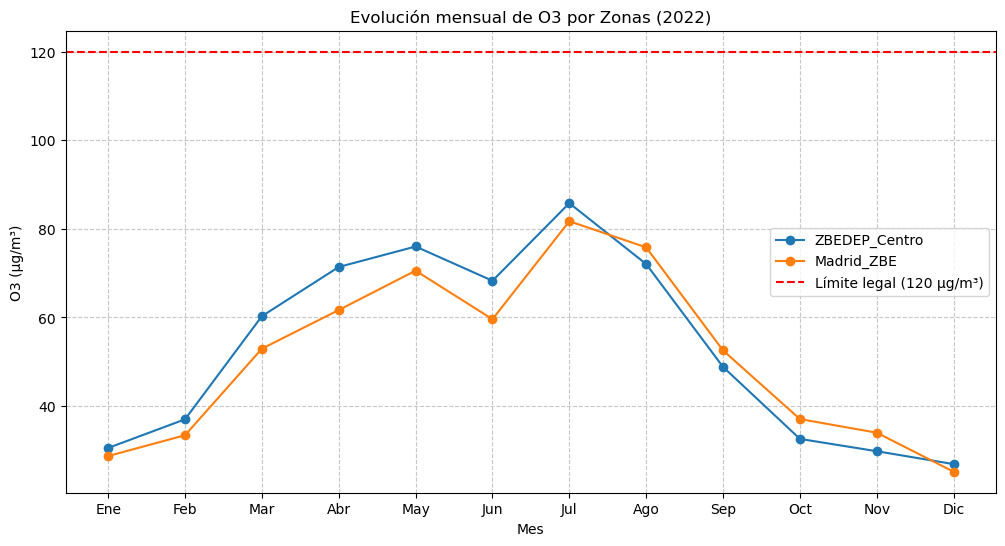

In [67]:
def visualizar_o3_temporal(df):
    # 1. Filtramos datos de O3
    o3_data = df[df['MAGNITUD'] == 14].copy()
    
    # 2. Calculamos medias diarias por zona y mes
    cols_valores = [f'D{str(i).zfill(2)}' for i in range(1, 32)]
    o3_data['O3_MEDIO'] = o3_data[cols_valores].mean(axis=1)
    o3_data['ZONA_ZBE'] = o3_data['ESTACION'].map(lambda x: get_zona(f"{x} - {nombres_estaciones[x]}"))
    
    # 3. Calculamos las medias mensuales (excluyendo Plaza Elíptica)
    medias_mensuales = o3_data.groupby(['ZONA_ZBE', 'MES'])['O3_MEDIO'].mean().reset_index()
    
    # 4. Creamos la gráfica
    plt.figure(figsize=(12, 6))
    
    # Una línea por cada zona (solo ZBEDEP_Centro y Madrid_ZBE)
    for zona in ['ZBEDEP_Centro', 'Madrid_ZBE']:
        datos_zona = medias_mensuales[medias_mensuales['ZONA_ZBE'] == zona]
        plt.plot(datos_zona['MES'], datos_zona['O3_MEDIO'], marker='o', label=zona)
    
    # Añadimos línea del límite legal
    plt.axhline(y=120, color='r', linestyle='--', label='Límite legal (120 µg/m³)')
    
    # Configuramos la gráfica
    plt.title('Evolución mensual de O3 por Zonas (2022)')
    plt.xlabel('Mes')
    plt.ylabel('O3 (µg/m³)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    
    plt.show()

# Ejecutamos la visualización
visualizar_o3_temporal(df_2022)

El análisis mensual de las concentraciones de O3 en Madrid durante 2022 muestra un patrón estacional
opuesto al del NO2, con valores más altos en primavera y verano. Este aumento se debe principalmente a 
la mayor radiación solar y temperaturas elevadas, factores que favorecen la formación de ozono troposférico 
a partir de sus precursores, NOx (NO2 / NO) y COVs (Compuestos orgánicos volátiles).

Destaca especialmente el pico registrado en julio, con valores cercanos a 85 µg/m³ tanto en ZBEDEP_Centro 
como en Madrid_ZBE. La similitud de valores entre zonas sugiere que la formación de O3 responde más a factores 
meteorológicos que a las restricciones locales de tráfico. 

Es notable la ausencia de datos en la ZBEDEP Plaza Elíptica por carecer de sensor para este contaminante.

A pesar de la marcada estacionalidad, los niveles de O3 se mantuvieron durante todo el año por debajo del 
límite legal de 120 µg/m³, incluso en los meses más críticos del verano.

### 2.4.2. Análisis labora/fin de semana del O3 por Zonas

In [70]:
def analisis_laboral_festivo_o3(o3_diario):
    o3_diario['ES_LABORAL'] = o3_diario['FECHA'].dt.dayofweek < 5
    print("Análisis O3 - Días Laborables vs Fin de Semana:")
    print("-" * 50)
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        datos_zona = o3_diario[o3_diario['ZONA_ZBE'] == zona]
        if len(datos_zona) > 0:  # Solo si hay datos para la zona
            media_laboral = datos_zona[datos_zona['ES_LABORAL']]['O3'].mean()
            media_finde = datos_zona[~datos_zona['ES_LABORAL']]['O3'].mean()
            print(f"\nZona: {zona}")
            print(f"Media días laborables: {media_laboral:.1f} µg/m³")
            print(f"Media fin de semana: {media_finde:.1f} µg/m³")
            print(f"Diferencia: {media_laboral - media_finde:.1f} µg/m³")

analisis_laboral_festivo_o3(o3_diario)

Análisis O3 - Días Laborables vs Fin de Semana:
--------------------------------------------------

Zona: ZBEDEP_Centro
Media días laborables: 53.1 µg/m³
Media fin de semana: 53.8 µg/m³
Diferencia: -0.7 µg/m³

Zona: Madrid_ZBE
Media días laborables: 50.5 µg/m³
Media fin de semana: 51.1 µg/m³
Diferencia: -0.6 µg/m³


El análisis de O3 por tipo de día revela un patrón interesante y opuesto al observado en otros 
contaminantes: los niveles son ligeramente superiores durante los fines de semana (diferencia 
de -0.7 µg/m³ en ZBEDEP_Centro y -0.6 µg/m³ en Madrid_ZBE). 

Esta paradoja se explica por la química atmosférica: durante los fines de semana, debido a la menor actividad humana, 
especialmente el tráfico, se reducen los gases de escape (NOx) que normalmente "consumen" el ozono, permitiendo que 
sus niveles aumenten levemente.

### 2.4.3 Análisis "Efecto Frontera" del O3

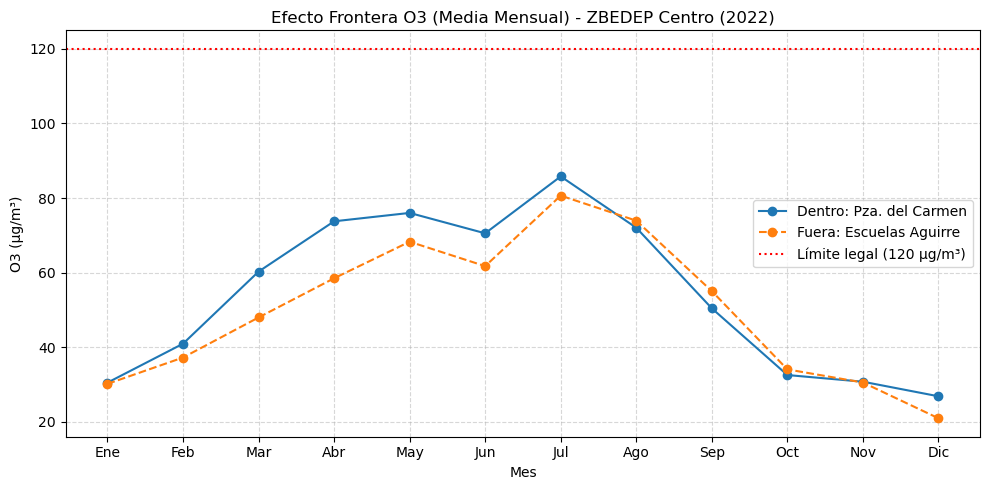


Diferencia media anual entre Plaza del Carmen (dentro) y Escuelas Aguirre (fuera):
4.2 µg/m³


In [73]:
def comparar_efecto_frontera_o3(o3_diario):
    plt.figure(figsize=(10, 5))
    
    # Estaciones a comparar
    estacion_dentro = 35  # Plaza del Carmen (ZBEDEP_Centro)
    estacion_fuera = 8    # Escuelas Aguirre (Madrid_ZBE)
    
    # Dentro
    datos_dentro = o3_diario[o3_diario['ESTACION'] == estacion_dentro].copy()
    datos_dentro['MES'] = datos_dentro['FECHA'].dt.month
    media_mensual_dentro = datos_dentro.groupby('MES')['O3'].mean()
    plt.plot(media_mensual_dentro.index, media_mensual_dentro.values, marker='o',
             label=f'Dentro: {nombres_estaciones[estacion_dentro]}')
    
    # Fuera
    datos_fuera = o3_diario[o3_diario['ESTACION'] == estacion_fuera].copy()
    datos_fuera['MES'] = datos_fuera['FECHA'].dt.month
    media_mensual_fuera = datos_fuera.groupby('MES')['O3'].mean()
    plt.plot(media_mensual_fuera.index, media_mensual_fuera.values, marker='o',
             linestyle='--', label=f'Fuera: {nombres_estaciones[estacion_fuera]}')
    
    # Añadimos línea del límite legal
    plt.axhline(y=120, color='r', linestyle=':', label='Límite legal (120 µg/m³)')
    
    # Configuramos el gráfico
    plt.title('Efecto Frontera O3 (Media Mensual) - ZBEDEP Centro (2022)')
    plt.xlabel('Mes')
    plt.ylabel('O3 (µg/m³)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    
    plt.tight_layout()
    plt.show()
    
    # Calculamos diferencias medias
    print("\nDiferencia media anual entre Plaza del Carmen (dentro) y Escuelas Aguirre (fuera):")
    diff_anual = datos_dentro['O3'].mean() - datos_fuera['O3'].mean()
    print(f"{diff_anual:.1f} µg/m³")

comparar_efecto_frontera_o3(o3_diario)

El análisis del efecto frontera para el O3 se centra en la comparación entre la estación de 
Plaza del Carmen (dentro de ZBEDEP_Centro) y Escuelas Aguirre (fuera pero cercana al perímetro). 

Los resultados muestran un patrón estacional similar en ambas ubicaciones, con una diferencia media 
anual de 4.2 µg/m³ más alta en el interior. Esta diferencia es más pronunciada durante los meses de 
primavera (marzo-mayo), mientras que prácticamente desaparece en los meses de otoño-invierno.

### 2.4.4. Conclusiones del análisis del O3

El análisis del ozono (O3) en Madrid durante 2022 revela patrones distintivos que lo diferencian 
de otros contaminantes:
- Muestra una marcada estacionalidad, con máximos en verano (~85 µg/m³ en julio) y mínimos en invierno
(~25 µg/m³ en diciembre), debido a su dependencia de la radiación solar para su formación.

- Presenta el llamado "efecto fin de semana", con niveles ligeramente superiores durante los días no
laborables, evidenciando la compleja relación inversa entre el tráfico y la formación de O3.

- El efecto frontera es moderado (diferencia de 4.2 µg/m³ entre dentro y fuera de ZBEDEP_Centro),
siendo más notable en primavera que en otoño-invierno.

- Los niveles se mantienen por debajo del límite legal (120 µg/m³) en todas las zonas y periodos, sugiriendo
un control adecuado de este contaminante.

- La ausencia de mediciones en Plaza Elíptica representa una limitación importante para la evaluación 
completa del impacto de las ZBE en los niveles de O3.

# Análisis Comparativo Multi-año de la Calidad del Aire en Madrid

En esta sección aplicamos el prototipo de análisis desarrollado para 2022 al resto de años disponibles 
(2020, 2021, 2023, 2024 y 2025) con el objetivo de identificar tendencias, cambios y patrones relevantes 
en la evolución de los principales contaminantes atmosféricos en Madrid, así como evaluar la efectividad de
las Zonas de Bajas Emisiones (ZBE) a lo largo del tiempo.

Se emplean las mismas funciones y metodología para asegurar la comparabilidad de los resultados entre 
años. Al final, se presentan interpretaciones y conclusiones globales basadas en la visión conjunta de 
todos los periodos analizados.

In [78]:
# Lista de años y rutas de los archivos de datos
anios = [2020, 2021, 2022, 2023, 2024, 2025]
rutas = {
    2020: '/Users/maruxamoreiraperez/Desktop/EscritorioMaru/Cursos/MacAir_Data Science /01_CAPSTONE/DataSets/AQI Madrid/datos2020_12.csv',
    2021: '/Users/maruxamoreiraperez/Desktop/EscritorioMaru/Cursos/MacAir_Data Science /01_CAPSTONE/DataSets/AQI Madrid/datos2021_12.csv',
    2022: '/Users/maruxamoreiraperez/Desktop/EscritorioMaru/Cursos/MacAir_Data Science /01_CAPSTONE/DataSets/AQI Madrid/datos2022_12.csv',
    2023: '/Users/maruxamoreiraperez/Desktop/EscritorioMaru/Cursos/MacAir_Data Science /01_CAPSTONE/DataSets/AQI Madrid/datos2023_12.csv',
    2024: '/Users/maruxamoreiraperez/Desktop/EscritorioMaru/Cursos/MacAir_Data Science /01_CAPSTONE/DataSets/AQI Madrid/datos2024_12.csv',
    2025: '/Users/maruxamoreiraperez/Desktop/EscritorioMaru/Cursos/MacAir_Data Science /01_CAPSTONE/DataSets/AQI Madrid/datos2025_02.csv'
}

In [79]:
# Diccionario para guardar los DataFrames de cada año
dfs = {}

for anio in anios:
    ruta = rutas[anio]
    dfs[anio] = pd.read_csv(ruta, sep=';')

In [80]:
# Diccionario para guardar los resultados de cada año
resultados = {}

for anio in anios:
    df = dfs[anio]
    # Aplica aquí tus funciones de transformación (ajusta los nombres si es necesario)
    no2_diario = transformar_a_diario_no2(df)
    pm10_diario = transformar_a_diario_pm10(df)
    pm25_diario = transformar_a_diario_pm25(df)
    o3_diario = transformar_a_diario_o3(df)
    
    # Guarda los resultados clave en el diccionario
    resultados[anio] = {
        'no2_diario': no2_diario,
        'pm10_diario': pm10_diario,
        'pm25_diario': pm25_diario,
        'o3_diario': o3_diario
    }

In [81]:
resultados[2021]['no2_diario']

ESTACION   ANO  MES  DIA   NO2      FECHA       ZONA_ZBE
0            4  2021    1    1  10.0 2021-01-01  ZBEDEP_Centro
1            4  2021    2    1  27.0 2021-02-01  ZBEDEP_Centro
2            4  2021    3    1  39.0 2021-03-01  ZBEDEP_Centro
3            4  2021    4    1  14.0 2021-04-01  ZBEDEP_Centro
4            4  2021    5    1  16.0 2021-05-01  ZBEDEP_Centro
...        ...   ...  ...  ...   ...        ...            ...
8861        60  2021    8   31  23.0 2021-08-31     Madrid_ZBE
8862        60  2021    9   31   0.0        NaT     Madrid_ZBE
8863        60  2021   10   31  13.0 2021-10-31     Madrid_ZBE
8864        60  2021   11   31   0.0        NaT     Madrid_ZBE
8865        60  2021   12   31  47.0 2021-12-31     Madrid_ZBE

[8866 rows x 7 columns]

In [82]:
# Limpiar los datos eliminando filas con FECHA nula (NaT) para todos los años y contaminantes

for anio in resultados:
    for clave in resultados[anio]:
        df = resultados[anio][clave]
        # Filtramos solo las filas donde FECHA no es nula
        resultados[anio][clave] = df[df['FECHA'].notna()].copy()

In [83]:
resultados[2021]['no2_diario']

ESTACION   ANO  MES  DIA   NO2      FECHA       ZONA_ZBE
0            4  2021    1    1  10.0 2021-01-01  ZBEDEP_Centro
1            4  2021    2    1  27.0 2021-02-01  ZBEDEP_Centro
2            4  2021    3    1  39.0 2021-03-01  ZBEDEP_Centro
3            4  2021    4    1  14.0 2021-04-01  ZBEDEP_Centro
4            4  2021    5    1  16.0 2021-05-01  ZBEDEP_Centro
...        ...   ...  ...  ...   ...        ...            ...
8858        60  2021    5   31  21.0 2021-05-31     Madrid_ZBE
8860        60  2021    7   31  12.0 2021-07-31     Madrid_ZBE
8861        60  2021    8   31  23.0 2021-08-31     Madrid_ZBE
8863        60  2021   10   31  13.0 2021-10-31     Madrid_ZBE
8865        60  2021   12   31  47.0 2021-12-31     Madrid_ZBE

[8699 rows x 7 columns]

# 1. Análisis mensula multi-anual de contaminantes

En este apartado analizaremos la evolución mensual de los principales contaminantes atmosféricos (NO2, PM10, PM2.5 y O3) en las distintas zonas de Madrid durante el periodo 2020-2025, permitiendo identificar tendencias, patrones estacionales y el impacto de las Zonas de Bajas Emisiones.

## 1.1. Análisis del NO2 multi-anual

evolución mensual de los niveles de NO2 en las distintas zonas de Madrid para el periodo 2020-2025, lo que permite identificar tendencias y comparar el impacto de las Zonas de Bajas Emisiones a lo largo de los años.

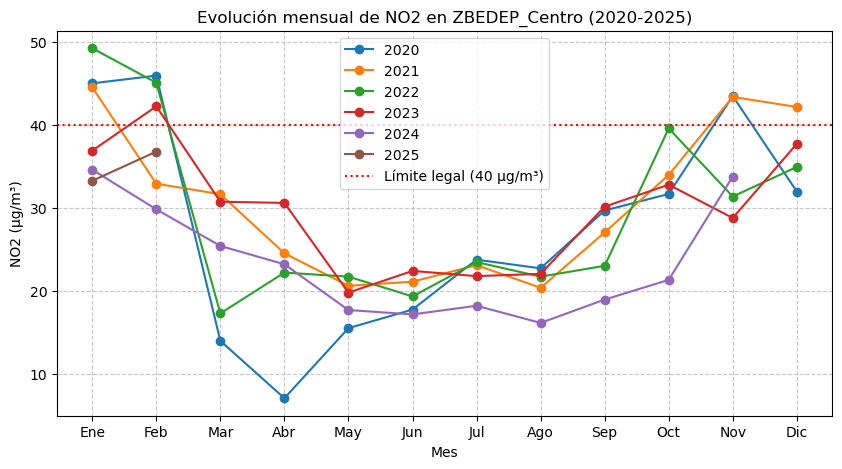

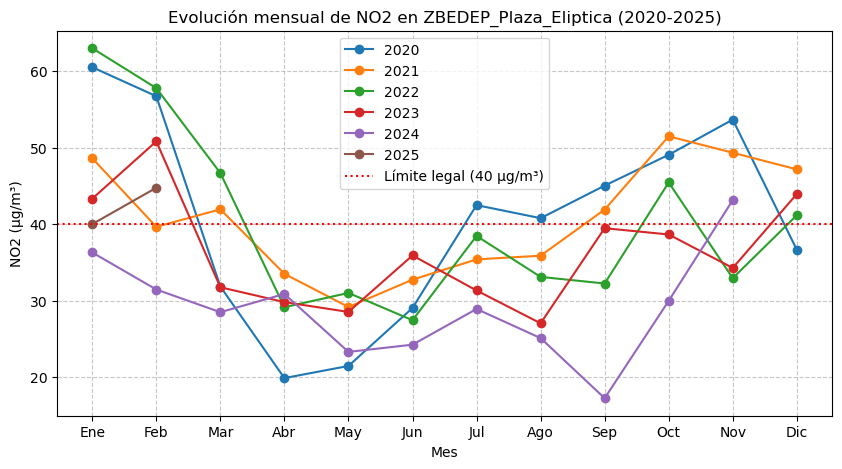

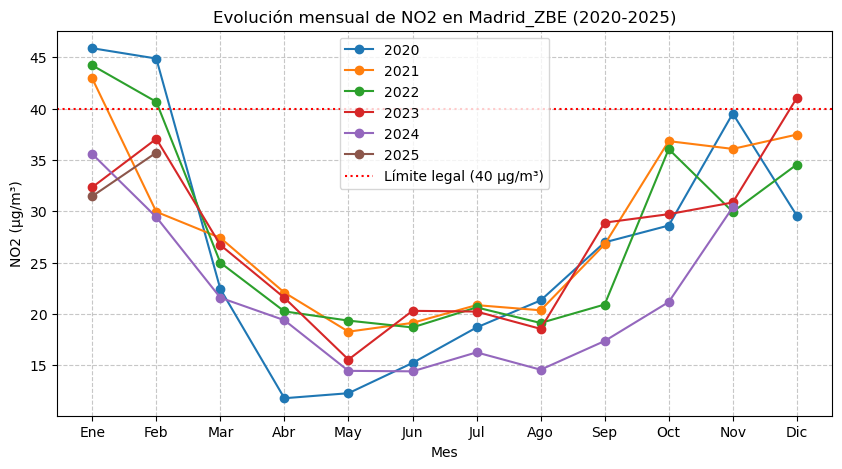

In [86]:
import matplotlib.pyplot as plt

zonas = ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']

for zona in zonas:
    plt.figure(figsize=(10,5))
    for anio in anios:
        df = resultados[anio]['no2_diario']
        media_mensual = df[df['ZONA_ZBE'] == zona].groupby(df['FECHA'].dt.month)['NO2'].mean()
        plt.plot(media_mensual.index, media_mensual.values, marker='o', label=f'{anio}')
    # Línea de límite legal para NO2
    plt.axhline(y=40, color='r', linestyle=':', label='Límite legal (40 µg/m³)')
    plt.title(f'Evolución mensual de NO2 en {zona} (2020-2025)')
    plt.xlabel('Mes')
    plt.ylabel('NO2 (µg/m³)')
    plt.xticks(range(1,13), ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Las gráficas muestran una clara tendencia a la baja en los niveles de NO2 en todas las zonas de 
Madrid desde 2020, especialmente en los primeros meses del año, con mínimos en primavera y repuntes
en otoño e invierno (que en 2020, 2021 y 2022 superaron el límite permitido). Este patrón estacional se repite cada año y es coherente con la influencia del 
tráfico y las condiciones meteorológicas.

La diferencia entre zonas se mantiene a lo largo de los años, aunque en general los niveles han disminuido,
lo que sugiere un efecto positivo de las Zonas de Bajas Emisiones (ZBE).

El año 2020 destaca por valores especialmente bajos en primavera, debidos al confinamiento y la reducción 
drástica del tráfico por la pandemia de COVID-19. 

En resumen, las ZBE han contribuido a una reducción progresiva del NO2, aunque persisten diferencias entre 
zonas y la estacionalidad sigue siendo un factor clave.

## 1.2. Análisis del PM10 multi-anual

Evolución mensual de los niveles de PM10 en las estaciones de Plaza Elíptica y en Madrid_ZBE entre 2020 y 2025.

Como se observamos en el análisis de 2022, no existen registros de PM10 en las estaciones del centro de Madrid, 
por lo que el estudio de este contaminante se centra en las zonas donde sí se dispone de datos, permitiendo observar
patrones estacionales y posibles efectos de las políticas de calidad del aire.

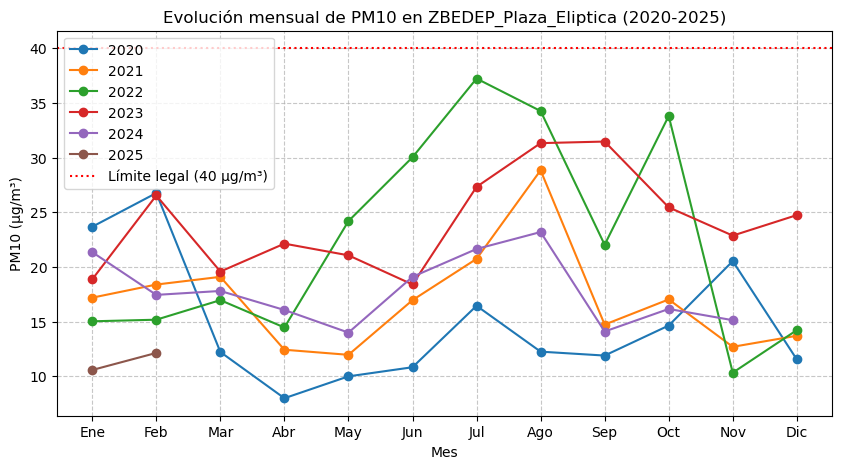

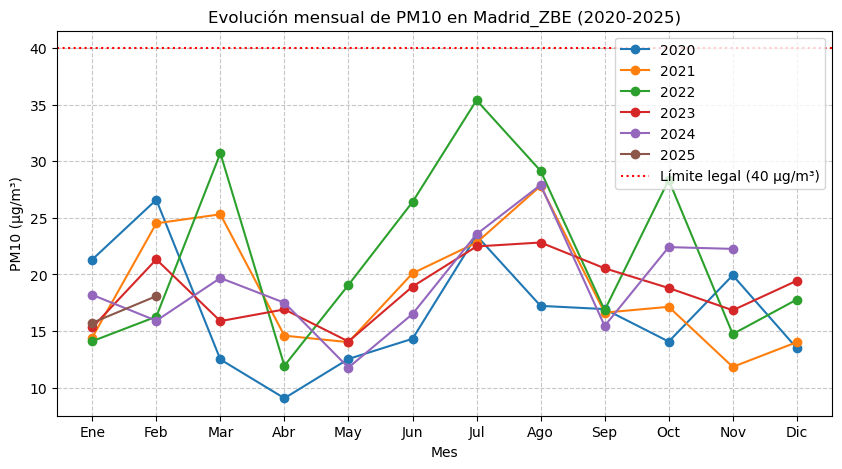

In [89]:
zonas = ['ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']

for zona in zonas:
    plt.figure(figsize=(10,5))
    for anio in anios:
        df = resultados[anio]['pm10_diario']
        media_mensual = df[df['ZONA_ZBE'] == zona].groupby(df['FECHA'].dt.month)['PM10'].mean()
        plt.plot(media_mensual.index, media_mensual.values, marker='o', label=f'{anio}')
    # Línea de límite legal
    plt.axhline(y=40, color='r', linestyle=':', label='Límite legal (40 µg/m³)')
    plt.title(f'Evolución mensual de PM10 en {zona} (2020-2025)')
    plt.xlabel('Mes')
    plt.ylabel('PM10 (µg/m³)')
    plt.xticks(range(1,13), ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Las gráficas muestran que los niveles de PM10 en Madrid se mantienen, en general, por debajo del límite legal de 
40 µg/m³en todas las zonas y años analizados. Se observa un patrón estacional con valores más altos en primavera 
y verano, y mínimos en invierno. Este comportamiento se debe a la menor frecuencia de lluvias y al aumento de la 
resuspensión de polvo y partículas en los meses cálidos, así como a la posible influencia de intrusiones de polvo 
africano, que afectan especialmente a la Península Ibérica en esas épocas.

En cuanto a la tendencia general, fuera de episodios excepcionales, los niveles de PM10 tienden a estabilizarse o 
a descender ligeramente en los últimos años, lo que puede estar relacionado tanto con la implantación de las ZBE 
como con la mejora progresiva de las políticas de calidad del aire y la renovación del parque móvil. Sin embargo, 
la variabilidad interanual y la sensibilidad de este contaminante a factoresmeteorológicos hacen que los descensos
sean menos marcados que en otros contaminantes como el NO2.

El control de PM10 en Madrid es efectivo en términos generales, pero sigue siendo un contaminante muy influido por 
condiciones meteorológicas y fenómenos naturales, lo que limita el impacto de las políticas locales en determinados episodios.

## 1.3. Análisis del PM2.5 multi-anual

Evolución mensual de los niveles de PM2.5 en las estaciones de Plaza Elíptica y en Madrid_ZBE entre 2020 y 2025.
Al igual que ocurre con el PM10, no existen registros de PM2.5 en las estaciones del centro de Madrid, por lo que el análisis se centra en las zonas donde sí se dispone de datos, permitiendo identificar tendencias, patrones estacionales y posibles efectos de las políticas de calidad del aire.

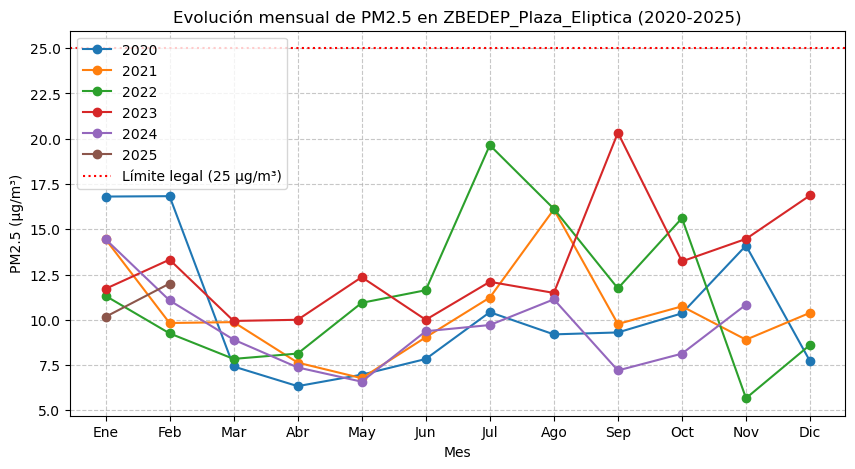

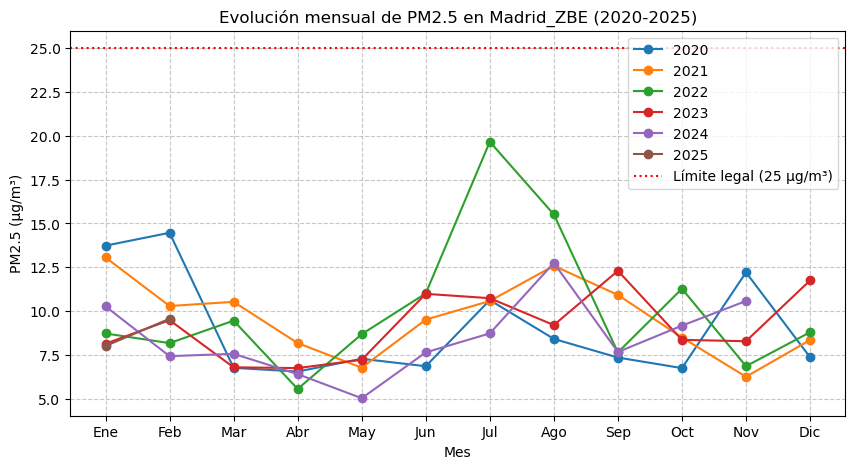

In [92]:
zonas = ['ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']

for zona in zonas:
    plt.figure(figsize=(10,5))
    for anio in anios:
        df = resultados[anio]['pm25_diario']
        media_mensual = df[df['ZONA_ZBE'] == zona].groupby(df['FECHA'].dt.month)['PM25'].mean()
        plt.plot(media_mensual.index, media_mensual.values, marker='o', label=f'{anio}')
    # Línea de límite legal para PM2.5
    plt.axhline(y=25, color='r', linestyle=':', label='Límite legal (25 µg/m³)')
    plt.title(f'Evolución mensual de PM2.5 en {zona} (2020-2025)')
    plt.xlabel('Mes')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.xticks(range(1,13), ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Las gráficas muestran que los niveles de PM2.5 en Plaza Elíptica y Madrid_ZBE se mantienen por debajo del límite 
legal de 25 µg/m³ durante la mayor parte del periodo analizado. Sin embargo, esto no implica necesariamente que la 
calidad del aire en Madrid sea óptima, ya que la ciudad sigue presentando episodios de contaminación visibles, 
especialmente en verano, cuando la conocida “boina” es claramente perceptible desde lejos.

El patrón estacional, con máximos en verano y principios de otoño, está relacionado tanto con factores meteorológicos 
directos (olas de calor, intrusiones de polvo sahariano) como con factores indirectos, como el aumento del uso de aire 
acondicionado y la resuspensión de partículas por la sequedad ambiental. Estos episodios pueden provocar incrementos 
puntuales de PM2.5, aunque no siempre se reflejen en los promedios mensuales.

La tendencia general es de estabilidad, pero la persistencia de estos episodios y la influencia de condiciones 
meteorológicas extremas subrayan la necesidad de mantener y reforzar las políticas de calidad del aire, así como 
de considerar la interacción entre clima, actividad urbana y contaminación.

## 1.4. Análisis del O3 multi-anual

Evolución mensual de los niveles de O3 en las estaciones de Plaza del Carmen (ZBEDEP_Centro) y Madrid_ZBE entre 2020 y 2025. El análisis se centra en estas zonas, ya que no existen registros de O3 en Plaza Elíptica. El objetivo es identificar patrones estacionales, tendencias y posibles efectos de las políticas de calidad del aire y de los factores meteorológicos.

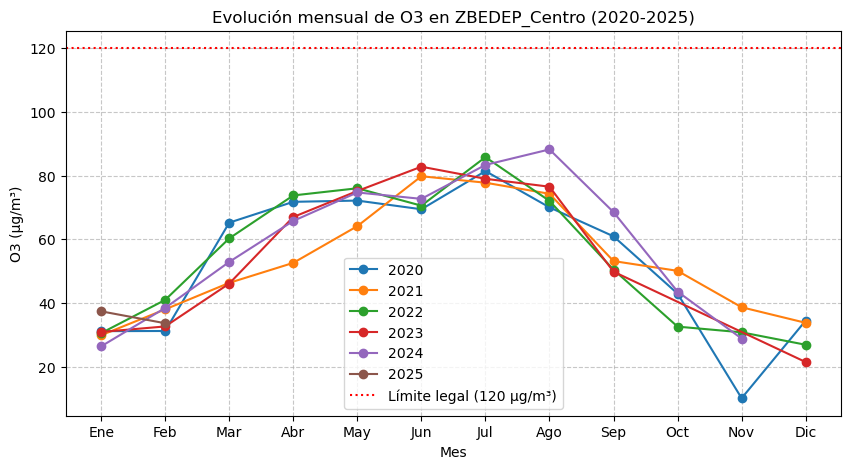

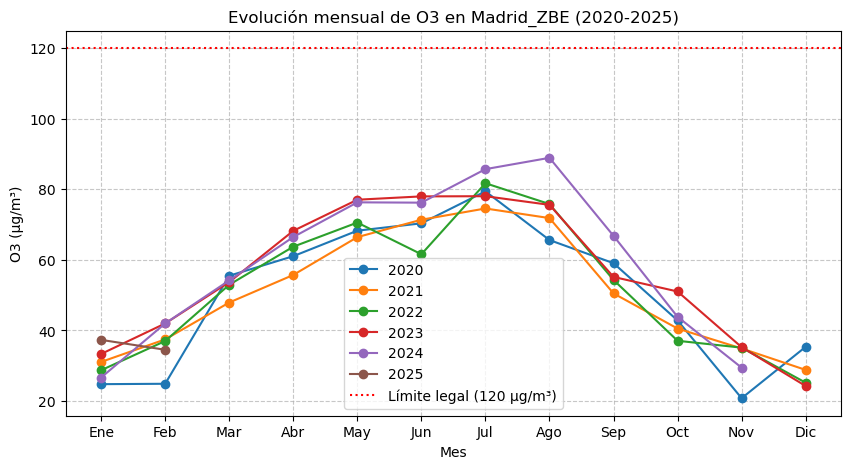

In [95]:
zonas = ['ZBEDEP_Centro', 'Madrid_ZBE']

for zona in zonas:
    plt.figure(figsize=(10,5))
    for anio in anios:
        df = resultados[anio]['o3_diario']
        media_mensual = df[df['ZONA_ZBE'] == zona].groupby(df['FECHA'].dt.month)['O3'].mean()
        plt.plot(media_mensual.index, media_mensual.values, marker='o', label=f'{anio}')
    # Línea de límite legal para O3
    plt.axhline(y=120, color='r', linestyle=':', label='Límite legal (120 µg/m³)')
    plt.title(f'Evolución mensual de O3 en {zona} (2020-2025)')
    plt.xlabel('Mes')
    plt.ylabel('O3 (µg/m³)')
    plt.xticks(range(1,13), ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Las gráficas muestran un patrón estacional muy marcado, con máximos de O3 en los meses de verano (junio-agosto) 
y mínimos en invierno, comportamiento típico de este contaminante en entornos urbanos. Este aumento estival se 
debe principalmente a la mayor radiación solar y temperaturas elevadas, que favorecen la formación de ozono 
troposférico a partir de sus precursores (NOx y COVs).

La similitud de los valores entre ZBEDEP_Centro y Madrid_ZBE a lo largo de todos los años indica que la formación 
de O3 depende principalmente de factores meteorológicos y de la química atmosférica, aunque está condicionada por 
la presencia de precursores emitidos por el tráfico, la industria y otras actividades urbanas. El ozono no se emite 
directamente, sino que se genera en la atmósfera a partir de óxidos de nitrógeno (NOx) y compuestos orgánicos 
volátiles (COVs), cuya concentración sí está relacionada con la actividad humana. 

Por ello, aunque las restricciones locales de tráfico pueden influir en la disponibilidad de precursores, el c
omportamiento del O3 es más homogéneo a escala urbana y regional, y está fuertemente modulado por la radiación solar y la temperatura.

# 2. Análisis laboral/fin de semana multi-anual de contaminantes

## 2.1. Análisis laboral/fin de semana NO2

In [99]:
resumen = []

for anio in anios:
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        df = resultados[anio]['no2_diario']
        if zona in df['ZONA_ZBE'].unique():
            df_zona = df[df['ZONA_ZBE'] == zona].copy()
            df_zona['ES_LABORAL'] = df_zona['FECHA'].dt.dayofweek < 5
            media_laboral = df_zona[df_zona['ES_LABORAL']]['NO2'].mean()
            media_finde = df_zona[~df_zona['ES_LABORAL']]['NO2'].mean()
            resumen.append({
                'Año': anio,
                'Zona': zona,
                'Contaminante': 'NO2',
                'Laboral': round(media_laboral, 1),
                'Fin de semana': round(media_finde, 1),
                'Diferencia': round(media_laboral - media_finde, 1)
            })

# Convertimos a DataFrame para visualizar
df_resumen = pd.DataFrame(resumen)
display(df_resumen)

Año                   Zona Contaminante  Laboral  Fin de semana  \
0   2020          ZBEDEP_Centro          NO2     29.5           21.8   
1   2020  ZBEDEP_Plaza_Eliptica          NO2     43.3           33.6   
2   2020             Madrid_ZBE          NO2     28.3           21.5   
3   2021          ZBEDEP_Centro          NO2     32.2           22.3   
4   2021  ZBEDEP_Plaza_Eliptica          NO2     43.1           34.3   
5   2021             Madrid_ZBE          NO2     30.4           22.7   
6   2022          ZBEDEP_Centro          NO2     28.4           24.9   
7   2022  ZBEDEP_Plaza_Eliptica          NO2     41.0           36.9   
8   2022             Madrid_ZBE          NO2     28.9           23.8   
9   2023          ZBEDEP_Centro          NO2     30.9           26.0   
10  2023  ZBEDEP_Plaza_Eliptica          NO2     38.0           31.5   
11  2023             Madrid_ZBE          NO2     28.5           22.7   
12  2024          ZBEDEP_Centro          NO2     24.7           19.7   
13  2024  ZBEDEP_Plaza_Eliptica          NO2     30.2           25.8   
14  2024             Madrid_ZBE          NO2     22.5           18.2   
15  2025          ZBEDEP_Centro          NO2     36.7           30.3   
16  2025  ZBEDEP_Plaza_Eliptica          NO2     43.4           39.1   
17  2025             Madrid_ZBE          NO2     34.9           29.6   

    Diferencia  
0          7.7  
1          9.7  
2          6.8  
3          9.9  
4          8.8  
5          7.7  
6          3.6  
7          4.2  
8          5.1  
9          4.9  
10         6.5  
11         5.8  
12         5.0  
13         4.4  
14         4.4  
15         6.3  
16         4.3  
17         5.3

## 2.2. Análisis laboral/fin de semana PM10

In [101]:
resumen_pm10 = []

for anio in anios:
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        df = resultados[anio]['pm10_diario']
        if zona in df['ZONA_ZBE'].unique():
            df_zona = df[df['ZONA_ZBE'] == zona].copy()
            df_zona['ES_LABORAL'] = df_zona['FECHA'].dt.dayofweek < 5
            media_laboral = df_zona[df_zona['ES_LABORAL']]['PM10'].mean()
            media_finde = df_zona[~df_zona['ES_LABORAL']]['PM10'].mean()
            resumen_pm10.append({
                'Año': anio,
                'Zona': zona,
                'Laboral': round(media_laboral, 1),
                'Fin de semana': round(media_finde, 1),
                'Diferencia': round(media_laboral - media_finde, 1)
            })

df_resumen_pm10 = pd.DataFrame(resumen_pm10)
display(df_resumen_pm10)

Año                   Zona  Laboral  Fin de semana  Diferencia
0   2020  ZBEDEP_Plaza_Eliptica     15.5           13.2         2.4
1   2020             Madrid_ZBE     17.7           14.2         3.5
2   2021  ZBEDEP_Plaza_Eliptica     17.7           15.3         2.4
3   2021             Madrid_ZBE     19.5           16.3         3.1
4   2022  ZBEDEP_Plaza_Eliptica     22.8           21.5         1.3
5   2022             Madrid_ZBE     22.8           19.5         3.3
6   2023  ZBEDEP_Plaza_Eliptica     25.0           21.9         3.1
7   2023             Madrid_ZBE     19.4           16.5         2.9
8   2024  ZBEDEP_Plaza_Eliptica     18.3           16.7         1.6
9   2024             Madrid_ZBE     20.0           17.4         2.6
10  2025          ZBEDEP_Centro     18.9           16.4         2.6
11  2025  ZBEDEP_Plaza_Eliptica     11.2           11.7        -0.5
12  2025             Madrid_ZBE     17.2           15.8         1.4

## 2.3. Análisis laboral/fin de semana PM2.5

In [103]:
resumen_pm25 = []

for anio in anios:
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        df = resultados[anio]['pm25_diario']
        if zona in df['ZONA_ZBE'].unique():
            df_zona = df[df['ZONA_ZBE'] == zona].copy()
            df_zona['ES_LABORAL'] = df_zona['FECHA'].dt.dayofweek < 5
            media_laboral = df_zona[df_zona['ES_LABORAL']]['PM25'].mean()
            media_finde = df_zona[~df_zona['ES_LABORAL']]['PM25'].mean()
            resumen_pm25.append({
                'Año': anio,
                'Zona': zona,
                'Laboral': round(media_laboral, 1),
                'Fin de semana': round(media_finde, 1),
                'Diferencia': round(media_laboral - media_finde, 1)
            })

df_resumen_pm25 = pd.DataFrame(resumen_pm25)
display(df_resumen_pm25)

Año                   Zona  Laboral  Fin de semana  Diferencia
0   2020  ZBEDEP_Plaza_Eliptica     10.6            9.5         1.1
1   2020             Madrid_ZBE      9.3            8.3         1.0
2   2021  ZBEDEP_Plaza_Eliptica     10.7            9.7         1.1
3   2021             Madrid_ZBE      9.9            8.9         1.0
4   2022  ZBEDEP_Plaza_Eliptica     11.4           11.6        -0.2
5   2022             Madrid_ZBE     10.2           10.1         0.0
6   2023  ZBEDEP_Plaza_Eliptica     13.1           12.7         0.3
7   2023             Madrid_ZBE      9.3            8.8         0.5
8   2024  ZBEDEP_Plaza_Eliptica      9.5            9.5         0.0
9   2024             Madrid_ZBE      8.7            8.0         0.7
10  2025          ZBEDEP_Centro      8.7            9.5        -0.8
11  2025  ZBEDEP_Plaza_Eliptica     10.9           11.4        -0.6
12  2025             Madrid_ZBE      8.6            9.2        -0.6

## 2.4. Análisis laboral/fin de semana O3

In [105]:
resumen_o3 = []

for anio in anios:
    for zona in ['ZBEDEP_Centro', 'ZBEDEP_Plaza_Eliptica', 'Madrid_ZBE']:
        df = resultados[anio]['o3_diario']
        if zona in df['ZONA_ZBE'].unique():
            df_zona = df[df['ZONA_ZBE'] == zona].copy()
            df_zona['ES_LABORAL'] = df_zona['FECHA'].dt.dayofweek < 5
            media_laboral = df_zona[df_zona['ES_LABORAL']]['O3'].mean()
            media_finde = df_zona[~df_zona['ES_LABORAL']]['O3'].mean()
            resumen_o3.append({
                'Año': anio,
                'Zona': zona,
                'Laboral': round(media_laboral, 1),
                'Fin de semana': round(media_finde, 1),
                'Diferencia': round(media_laboral - media_finde, 1)
            })

df_resumen_o3 = pd.DataFrame(resumen_o3)
display(df_resumen_o3)

Año                   Zona  Laboral  Fin de semana  Diferencia
0   2020          ZBEDEP_Centro     52.1           57.2        -5.1
1   2020  ZBEDEP_Plaza_Eliptica     41.7           48.6        -6.8
2   2020             Madrid_ZBE     49.4           54.1        -4.7
3   2021          ZBEDEP_Centro     51.4           58.0        -6.6
4   2021             Madrid_ZBE     49.3           55.3        -5.9
5   2022          ZBEDEP_Centro     53.1           57.3        -4.3
6   2022             Madrid_ZBE     50.5           54.6        -4.1
7   2023          ZBEDEP_Centro     56.4           55.9         0.5
8   2023             Madrid_ZBE     56.0           56.0        -0.0
9   2024          ZBEDEP_Centro     57.7           61.0        -3.4
10  2024             Madrid_ZBE     59.3           61.1        -1.8
11  2025          ZBEDEP_Centro     35.3           36.5        -1.2
12  2025             Madrid_ZBE     35.9           36.1        -0.2

## 2.5. Conclusiones

**NO2:**
El dióxido de nitrógeno (NO2) presenta valores consistentemente más altos en días laborables que en fines de semana en todas las zonas y años analizados, con diferencias especialmente marcadas en Plaza Elíptica y Centro. Este patrón evidencia la fuerte relación del NO2 con el tráfico y la actividad laboral, ya que estos factores incrementan notablemente las emisiones de este contaminante durante la semana.

**PM10:**
Las concentraciones de partículas PM10 muestran diferencias mucho menores entre días laborables y fines de semana en comparación con el NO2. En algunos años y zonas, la diferencia es prácticamente nula o incluso negativa. Esto sugiere que las fuentes de PM10 no dependen exclusivamente del tráfico, sino que están influenciadas también por otros factores como la resuspensión de polvo o las calefacciones, lo que diluye el efecto del patrón laboral.

**PM2.5:**
El comportamiento de las partículas finas PM2.5 es similar al de PM10, con diferencias muy pequeñas entre días laborables y fines de semana, e incluso valores negativos en algunos casos. Esto indica que las fuentes de PM2.5 son variadas y no están tan ligadas a la actividad laboral, reflejando la contribución de fuentes residenciales, ambientales y de fondo urbano.

**O3:**
El ozono (O3) muestra un comportamiento opuesto al de los contaminantes primarios: sus valores son sistemáticamente más altos en fines de semana que en días laborables. Este fenómeno se debe a la naturaleza secundaria del ozono, que se forma a partir de precursores (NOx y compuestos orgánicos volátiles) que disminuyen durante el fin de semana, favoreciendo la acumulación de O3 en la atmósfera.

# 3. Análisis del "Efecto Frontera" multi-anual

## 3.1. Análisis "Efecto Frontera" NO2 multi-anual

Selección de estaciones para el efecto frontera:
- Dentro de la ZBE Centro:
28079008 (Escuelas Aguirre)
  
- Fuera de la ZBE pero cerca del borde:
28079036 (Castellana)
28079039 (Cuatro Caminos)

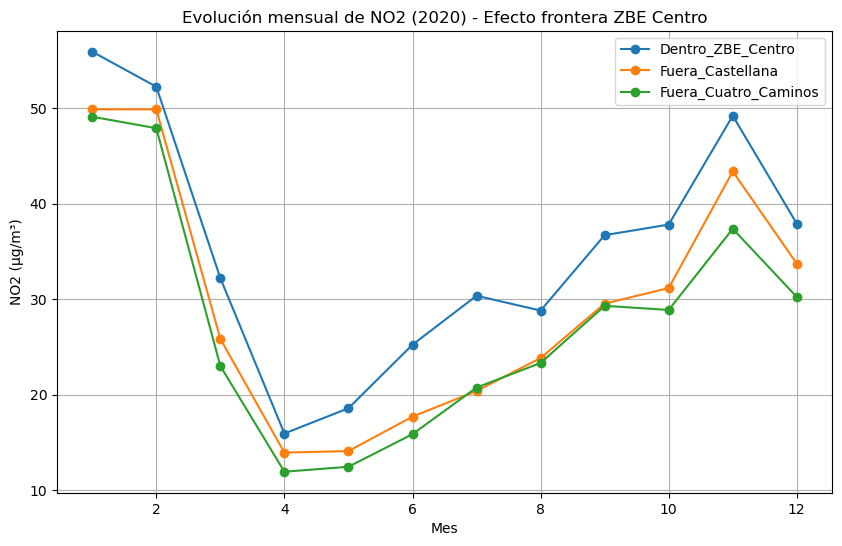

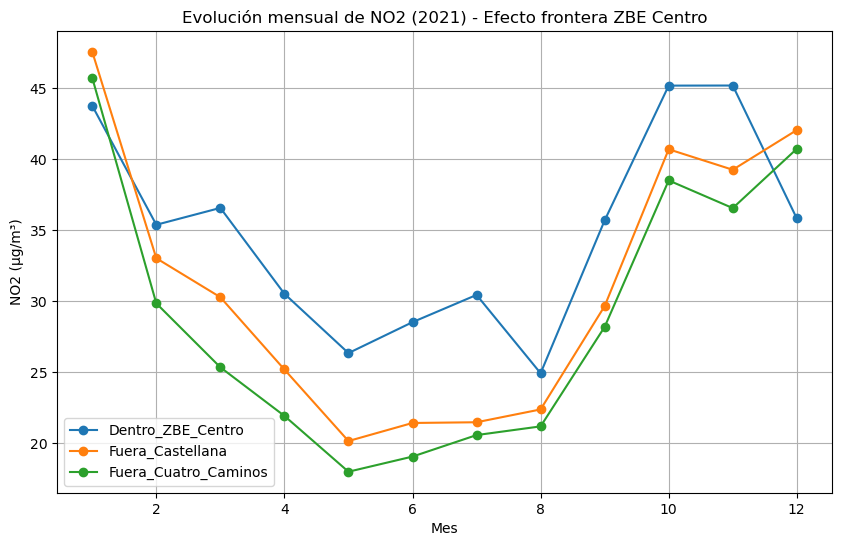

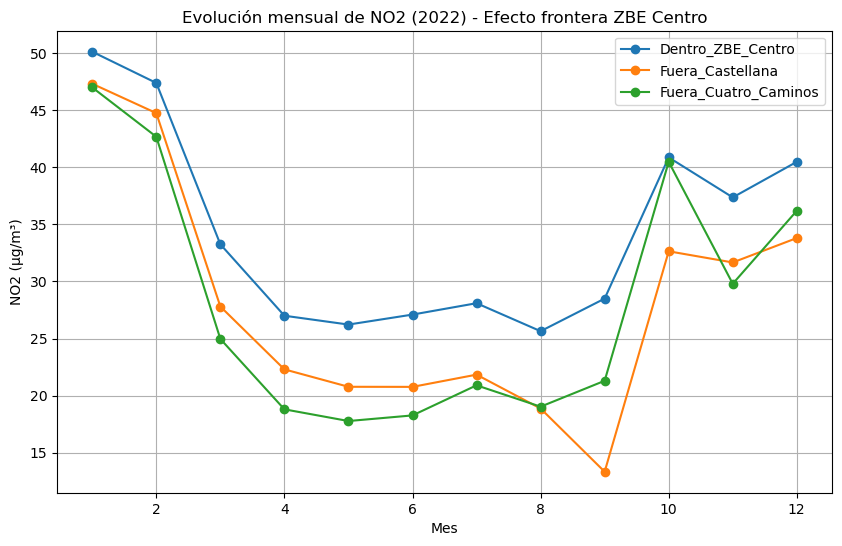

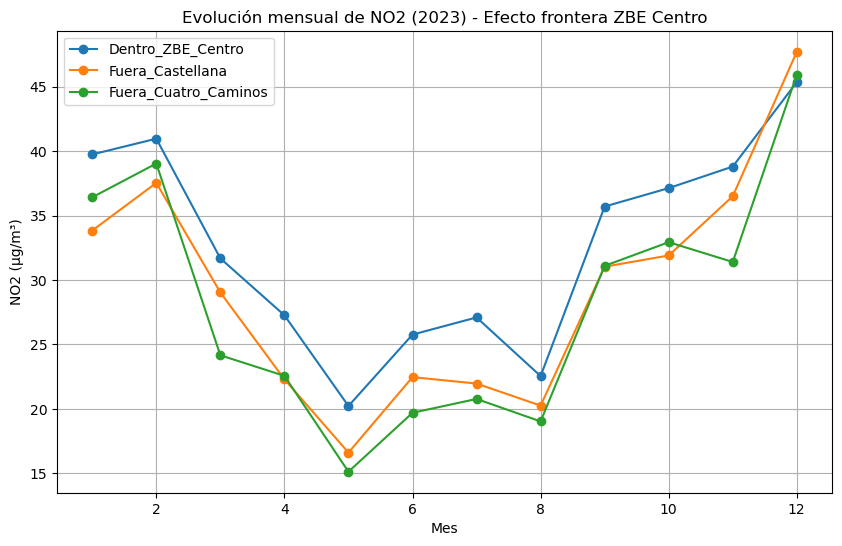

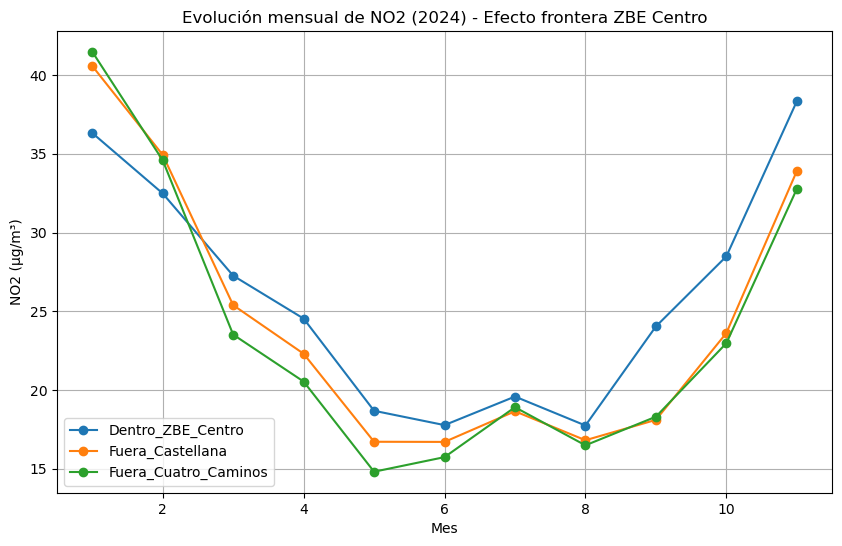

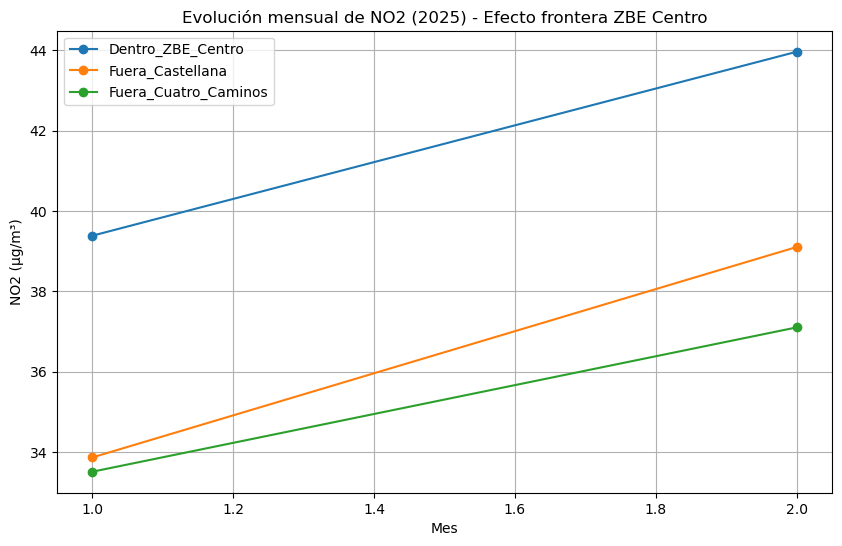

In [114]:
# Estaciones seleccionadas (ajusta los códigos según tu correspondencia)
estaciones = {
    'Dentro_ZBE_Centro': '8',   # Escuelas Aguirre
    'Fuera_Castellana': '36',   # Castellana
    'Fuera_Cuatro_Caminos': '39' # Cuatro Caminos
}

import matplotlib.pyplot as plt

for anio in anios:
    df_no2 = resultados[anio]['no2_diario']
    # Filtramos solo las estaciones seleccionadas
    df_frontera = df_no2[df_no2['ESTACION'].astype(str).isin(estaciones.values())].copy()
    # Añadimos columna con el nombre de la zona (dentro/fuera)
    df_frontera['Zona_Frontera'] = df_frontera['ESTACION'].astype(str).map({v: k for k, v in estaciones.items()})
    # Calculamos la media mensual de NO2 para cada estación
    df_frontera['Mes'] = df_frontera['FECHA'].dt.month
    resumen_frontera = df_frontera.groupby(['Zona_Frontera', 'Mes'])['NO2'].mean().reset_index()

    # Visualización
    plt.figure(figsize=(10,6))
    for zona in resumen_frontera['Zona_Frontera'].unique():
        datos = resumen_frontera[resumen_frontera['Zona_Frontera'] == zona]
        plt.plot(datos['Mes'], datos['NO2'], marker='o', label=zona)
    plt.title(f'Evolución mensual de NO2 ({anio}) - Efecto frontera ZBE Centro')
    plt.xlabel('Mes')
    plt.ylabel('NO2 (µg/m³)')
    plt.legend()
    plt.grid(True)
    plt.show()

Durante el periodo 2020-2025, los niveles de NO2 son más altos dentro de la ZBE Centro (Escuelas Aguirre) 
que en las estaciones limítrofes exteriores (Castellana y Cuatro Caminos). La implantación de la ZBE Centro 
en Madrid, que comenzó a aplicarse de forma efectiva a finales de 2021, no genera un cambio brusco en el g
radiente de NO2 entre dentro y fuera, pero sí se observa una ligera reducción de la diferencia a partir de 2022, 
especialmente en los meses de primavera y verano. 

Esto indica que la ZBE contribuye a una mejora local de la calidad del aire, aunque el efecto frontera es 
progresivo y no abrupto, reflejando la influencia de la dinámica urbana y la dispersión de contaminantes. 

En definitiva, la ZBE Centro ayuda a reducir el NO2, pero la transición entre dentro y fuera es gradual, lo que sugiere que las medidas deben complementarse con estrategias a mayor escala para maximizar el impacto.

## 3.2. Análisis "Efecto Frontera" PM10 multi-anual

Selección de estaciones para el efecto frontera:
- Dentro de la ZBEDEP Plaza Elíptica:
28079056 (Plaza Elíptica)
  
- Fuera de la ZBEDEP pero cerca del borde:
28079018 (Farolillo)

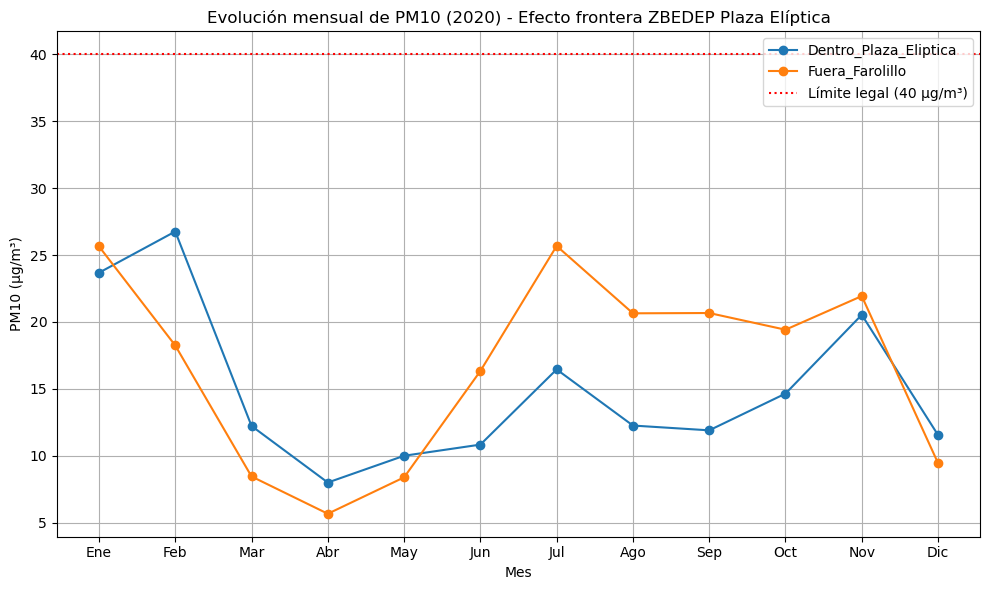

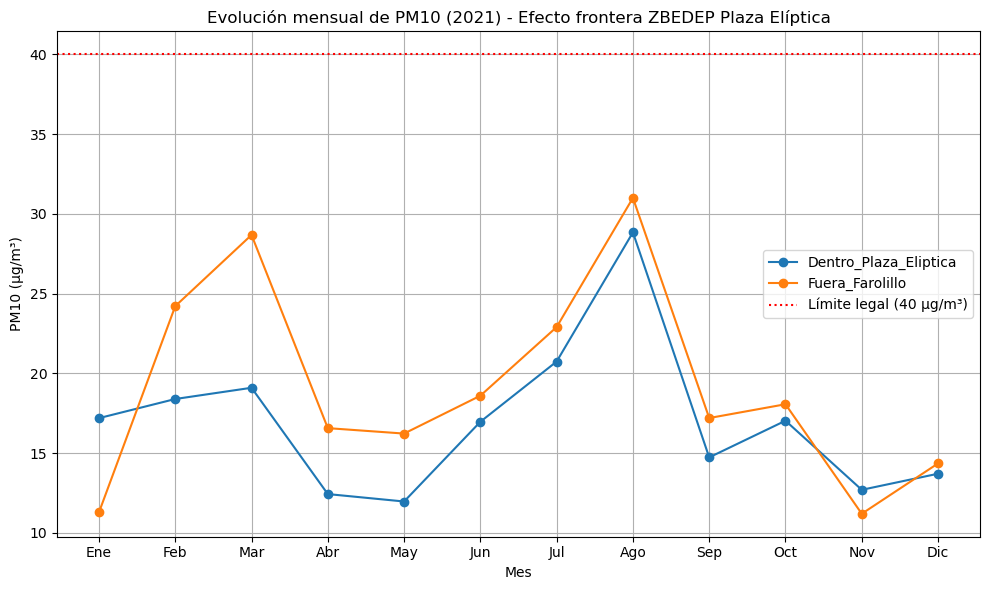

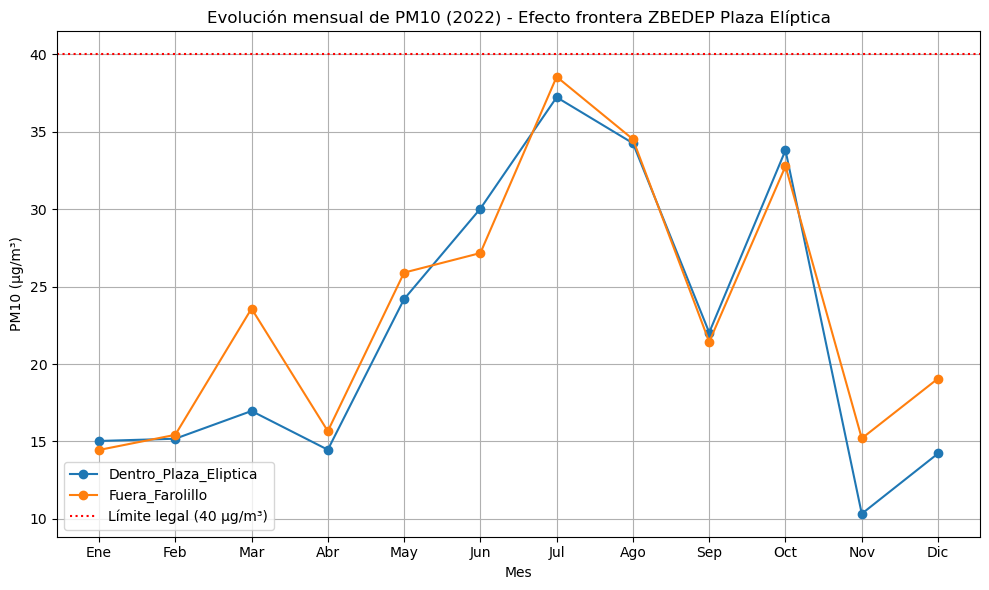

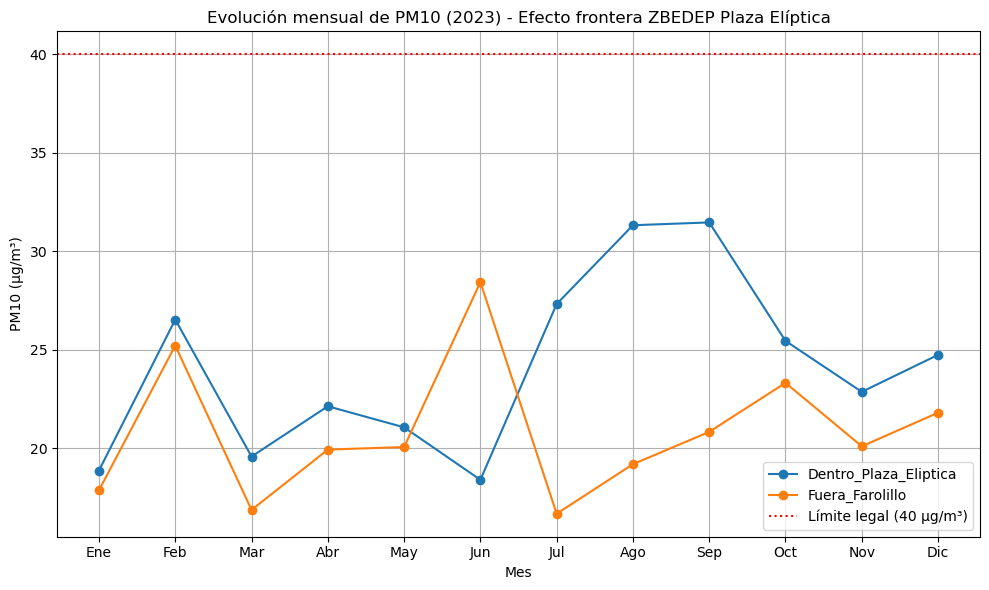

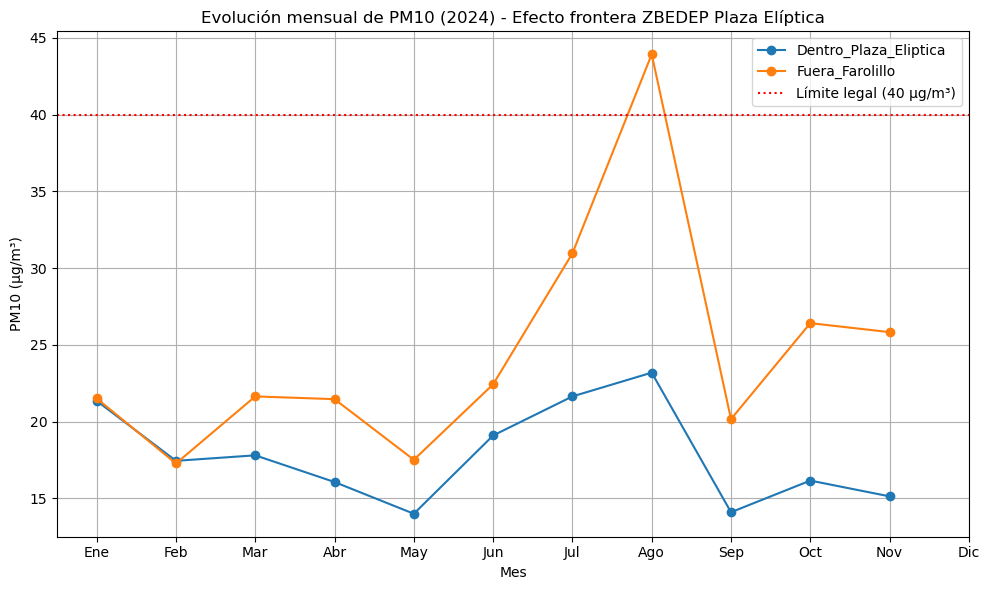

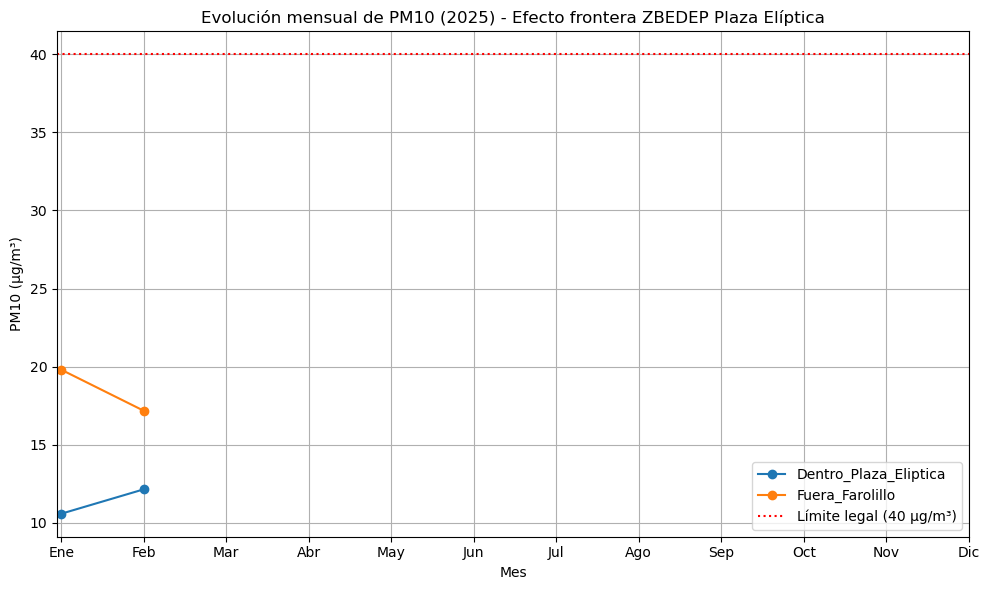

In [116]:
# Estaciones seleccionadas para el efecto frontera PM10
estaciones_pm10 = {
    'Dentro_Plaza_Eliptica': '56',   # Plaza Elíptica
    'Fuera_Farolillo': '18'          # Farolillo
}

import matplotlib.pyplot as plt

for anio in anios:
    df_pm10 = resultados[anio]['pm10_diario']
    # Filtramos solo las estaciones seleccionadas
    df_frontera_pm10 = df_pm10[df_pm10['ESTACION'].astype(str).isin(estaciones_pm10.values())].copy()
    # Añadimos columna con el nombre de la zona (dentro/fuera)
    df_frontera_pm10['Zona_Frontera'] = df_frontera_pm10['ESTACION'].astype(str).map({v: k for k, v in estaciones_pm10.items()})
    # Calculamos la media mensual de PM10 para cada estación
    df_frontera_pm10['Mes'] = df_frontera_pm10['FECHA'].dt.month
    resumen_frontera_pm10 = df_frontera_pm10.groupby(['Zona_Frontera', 'Mes'])['PM10'].mean().reset_index()

    # Visualización
    plt.figure(figsize=(10,6))
    for zona in resumen_frontera_pm10['Zona_Frontera'].unique():
        datos = resumen_frontera_pm10[resumen_frontera_pm10['Zona_Frontera'] == zona]
        plt.plot(datos['Mes'], datos['PM10'], marker='o', label=zona)
    plt.axhline(y=40, color='r', linestyle=':', label='Límite legal (40 µg/m³)')
    plt.title(f'Evolución mensual de PM10 ({anio}) - Efecto frontera ZBEDEP Plaza Elíptica')
    plt.xlabel('Mes')
    plt.ylabel('PM10 (µg/m³)')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    plt.tight_layout()
    plt.show()

A lo largo del periodo 2020-2025, los niveles de PM10 tanto en Plaza Elíptica (dentro de la ZBEDEP) 
como en Farolillo (fuera, cerca del borde) se mantienen generalmente por debajo del límite legal de 40 µg/m³. 

No se observa un efecto frontera claro ni una diferencia entre ambas estaciones, los valores son similares 
en la mayoría de meses y años; exiten excepciones como en 2024 en la estación Farolillo que presenta un pico 
puntual registrado en agosto. Estos episodios pueden deberse a fuentes externas a la ZBEDEP, condiciones meteorológicas
o eventos locales, lo que refuerza la idea de que el PM10 tiene un comportamiento más disperso y menos dependiente 
del tráfico que el NO2. 

En definitiva, la ZBEDEP no genera un gradiente marcado de PM10 en la frontera, y los episodios puntuales 
fuera de la zona subrayan la importancia de factores externos y regionales en la concentración de partículas.

## 3.3. Análisis "Efecto Frontera" PM2.5 multi-anual

Selección de estaciones para el efecto frontera:
- Dentro de la ZBEDEP Plaza Elíptica:
28079056 (Plaza Elíptica)
  
- Fuera de la ZBEDEP pero cerca del borde:
28079047 (Méndez Álvaro)

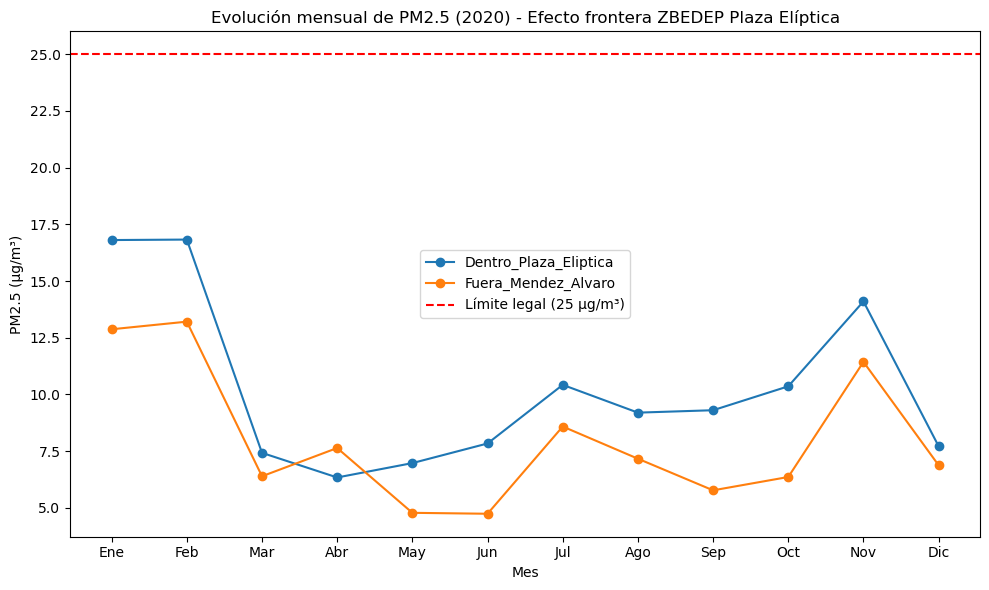

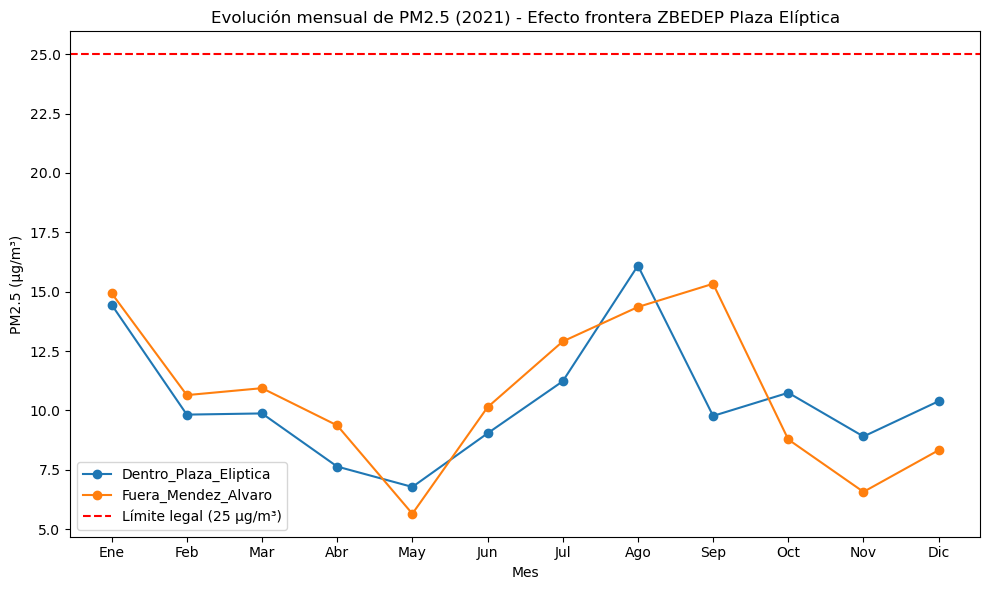

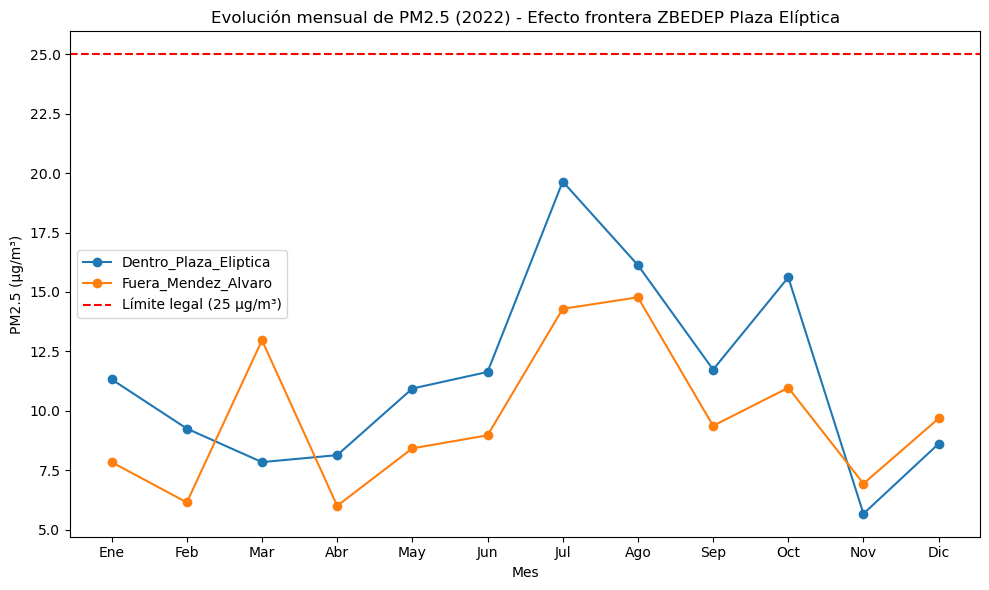

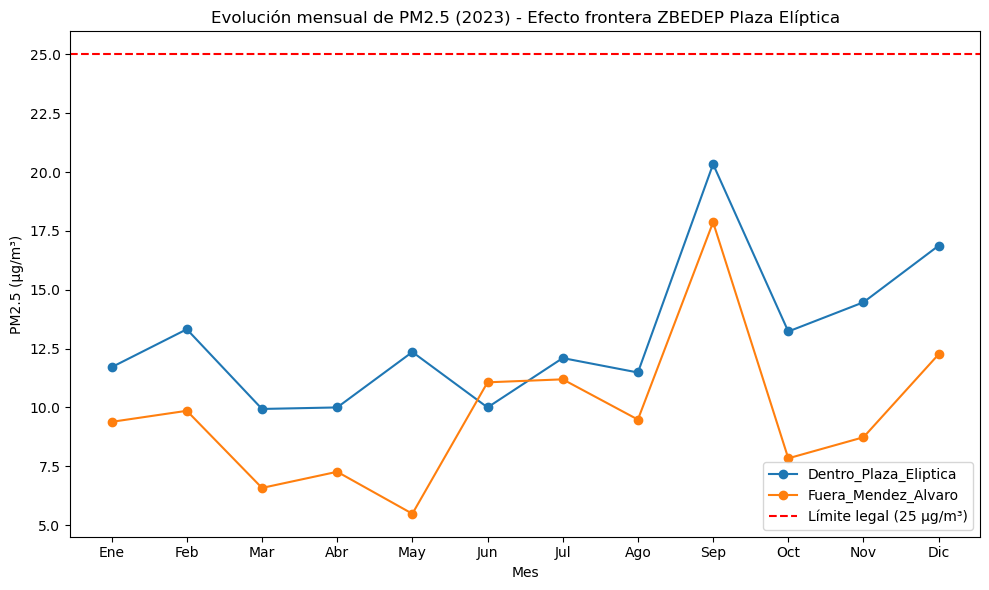

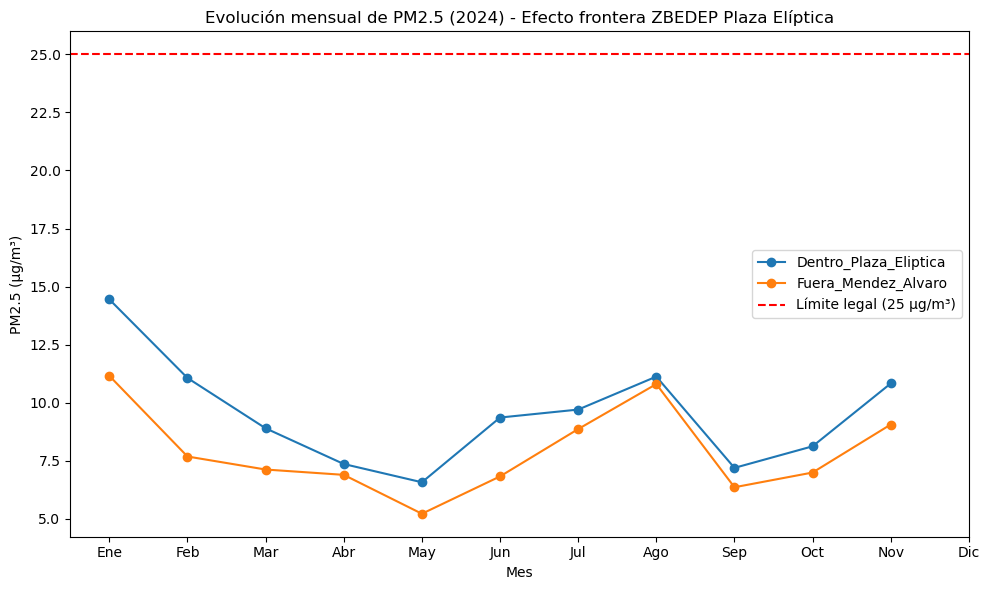

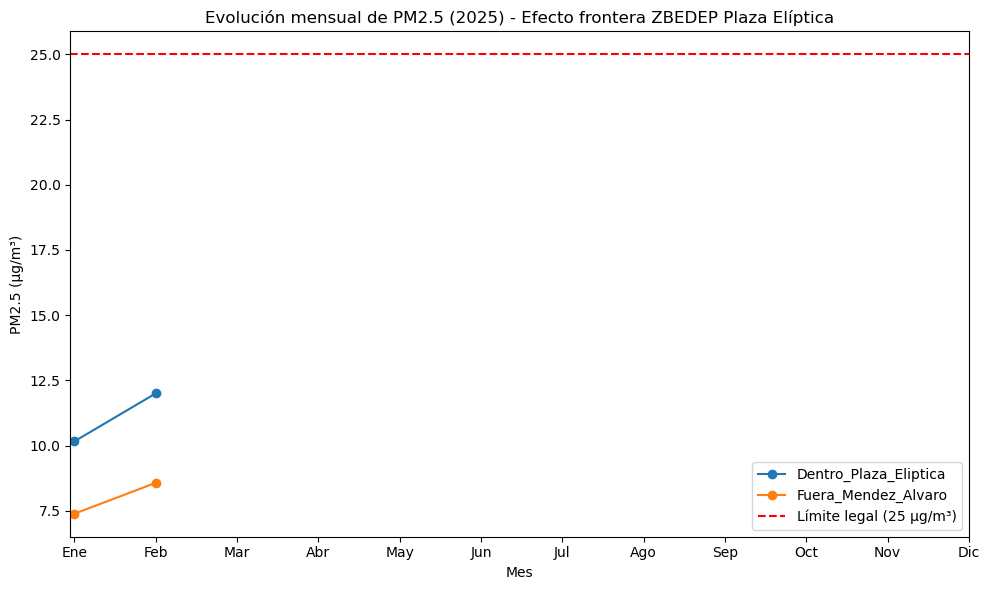

In [118]:
# Estaciones seleccionadas para el efecto frontera PM2.5
estaciones_pm25 = {
    'Dentro_Plaza_Eliptica': '56',   # Plaza Elíptica
    'Fuera_Mendez_Alvaro': '47'      # Méndez Álvaro
}

import matplotlib.pyplot as plt

for anio in anios:
    df_pm25 = resultados[anio]['pm25_diario']
    # Filtramos solo las estaciones seleccionadas
    df_frontera_pm25 = df_pm25[df_pm25['ESTACION'].astype(str).isin(estaciones_pm25.values())].copy()
    # Añadimos columna con el nombre de la zona (dentro/fuera)
    df_frontera_pm25['Zona_Frontera'] = df_frontera_pm25['ESTACION'].astype(str).map({v: k for k, v in estaciones_pm25.items()})
    # Calculamos la media mensual de PM2.5 para cada estación
    df_frontera_pm25['Mes'] = df_frontera_pm25['FECHA'].dt.month
    resumen_frontera_pm25 = df_frontera_pm25.groupby(['Zona_Frontera', 'Mes'])['PM25'].mean().reset_index()

    # Visualización
    plt.figure(figsize=(10,6))
    for zona in resumen_frontera_pm25['Zona_Frontera'].unique():
        datos = resumen_frontera_pm25[resumen_frontera_pm25['Zona_Frontera'] == zona]
        plt.plot(datos['Mes'], datos['PM25'], marker='o', label=zona)
    plt.axhline(y=25, color='r', linestyle='--', label='Límite legal (25 µg/m³)')
    plt.title(f'Evolución mensual de PM2.5 ({anio}) - Efecto frontera ZBEDEP Plaza Elíptica')
    plt.xlabel('Mes')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    plt.tight_layout()
    plt.show()

Durante el periodo 2020–2025, el análisis de los niveles de PM2.5 en la frontera de la ZBEDEP Plaza Elíptica
muestra la importancia de considerar el contexto social y ambiental para interpretar correctamente los datos. 

El año 2020, marcado por el confinamiento, la reducción drástica de la movilidad y el teletrabajo generalizado, 
supuso un descenso excepcional de las concentraciones de PM2.5 en toda la ciudad. Este comportamiento evidencia 
el peso de la movilidad y la actividad urbana en la generación de partículas, pero también deja claro que estos 
descensos no son atribuibles a la política local, sino a circunstancias extraordinarias.

A partir de 2021, con la recuperación progresiva de la actividad y la movilidad, los niveles de PM2.5 aumentan, aunque sin alcanzar los valores prepandemia. La comparación entre la estación dentro de la ZBEDEP y la situada fuera revela que las diferencias son generalmente pequeñas y variables, sin un patrón consistente que pueda asociarse directamente a la implantación de la zona de bajas emisiones. En varios periodos, se observan episodios de incremento de PM2.5 que afectan tanto al interior como al exterior de la ZBEDEP, lo que apunta a la influencia dominante de factores regionales, meteorológicos o intrusiones de polvo, frente al impacto de las restricciones locales al tráfico.

La evolución multi-anual del PM2.5 en la frontera de la ZBEDEP Plaza Elíptica confirma que la eficacia de las políticas locales sobre este contaminante es limitada y difícil de aislar, especialmente en comparación con contaminantes más ligados al tráfico como el NO₂. La mejora observada en la calidad del aire tras la pandemia responde a una combinación de factores, siendo fundamental abordar la reducción de partículas finas desde una perspectiva regional y multisectorial.


## 3.1. Análisis "Efecto Frontera" O3 multi-anual

Selección de estaciones para el efecto frontera:
- Dentro de la ZBEDEP Plaza del Carmen:
28079028 (Plaza del Carmen)

- Fuera de la ZBEDEP pero cerca del borde:
28079008 (Escuelas Aguirre)


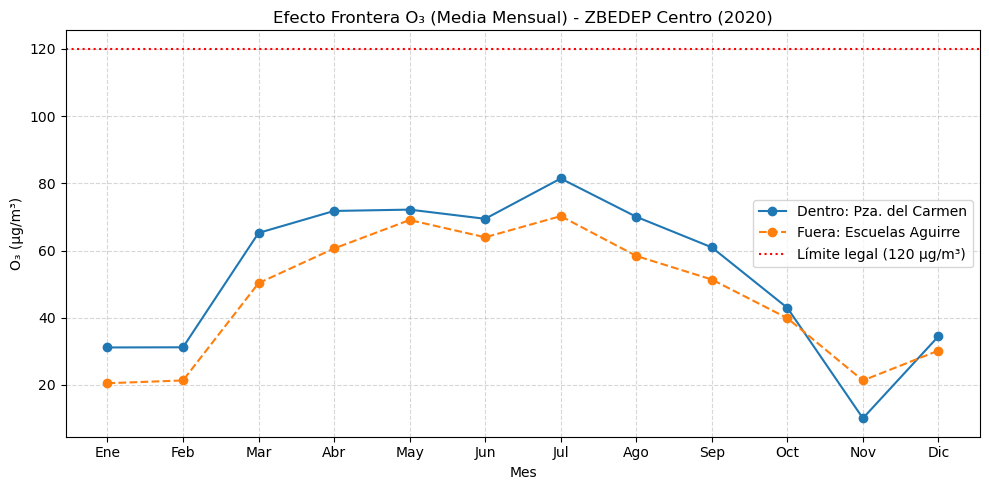


Diferencia media anual entre Plaza del Carmen (dentro) y Escuelas Aguirre (fuera) en 2020: 7.0 µg/m³


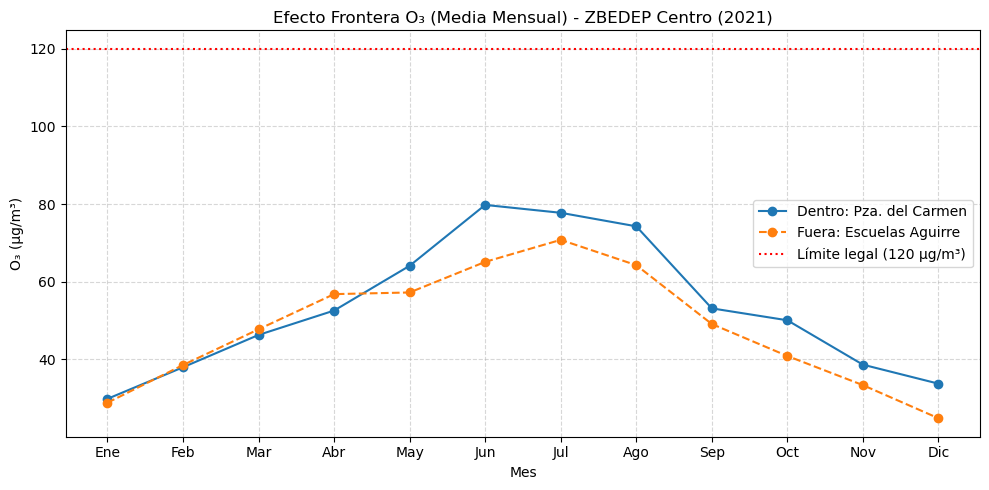


Diferencia media anual entre Plaza del Carmen (dentro) y Escuelas Aguirre (fuera) en 2021: 5.1 µg/m³


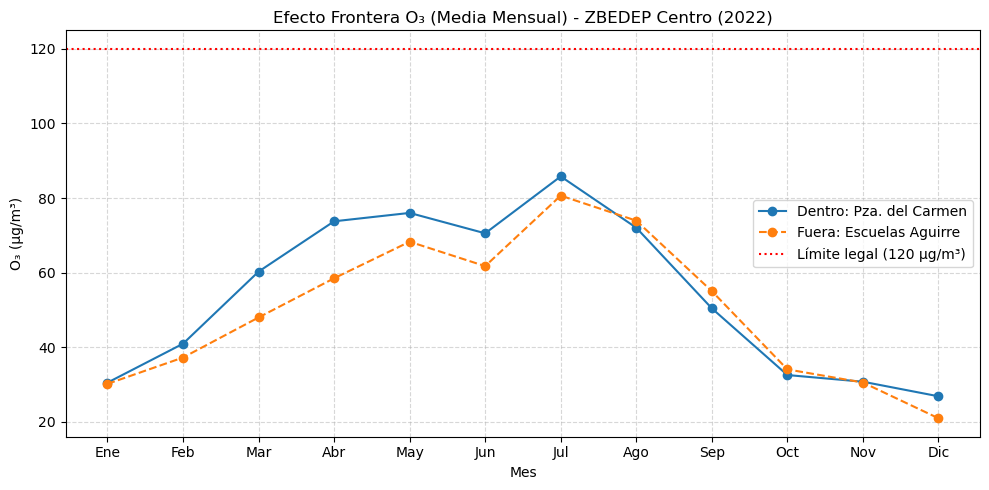


Diferencia media anual entre Plaza del Carmen (dentro) y Escuelas Aguirre (fuera) en 2022: 4.3 µg/m³


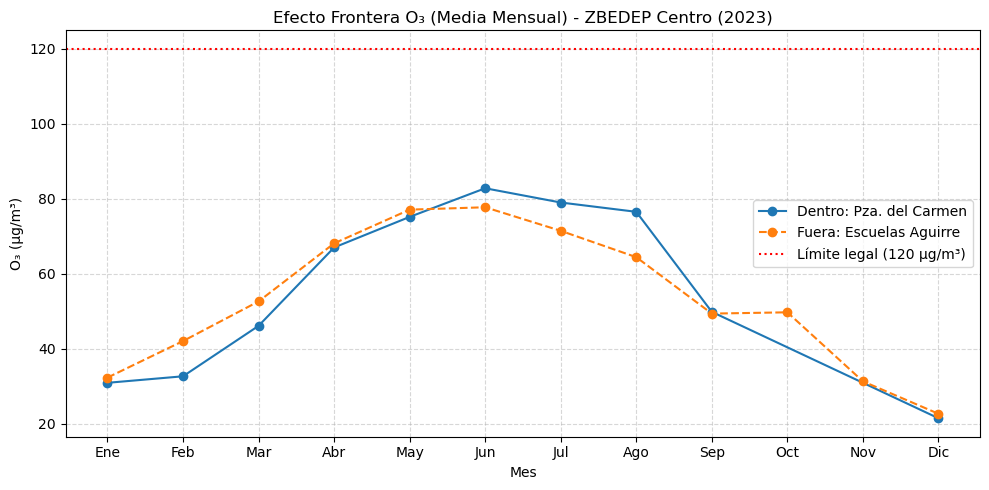


Diferencia media anual entre Plaza del Carmen (dentro) y Escuelas Aguirre (fuera) en 2023: 3.0 µg/m³


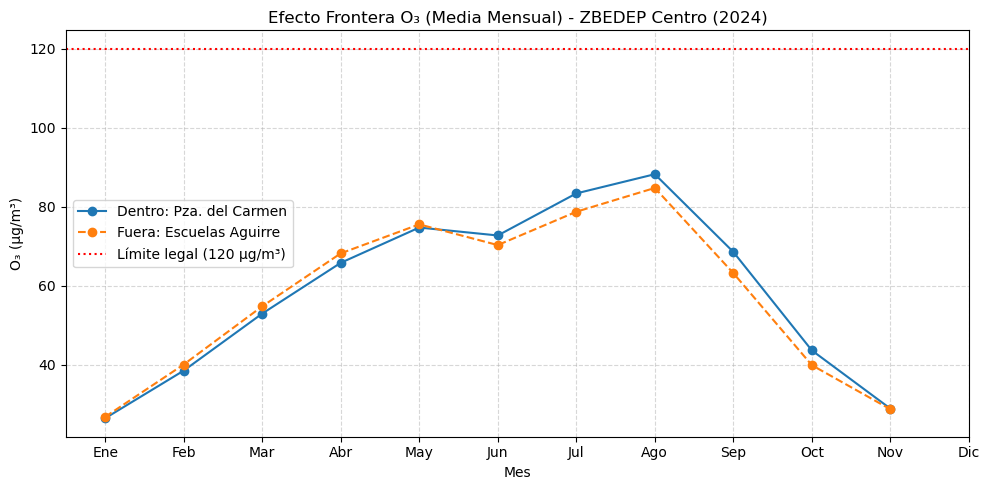


Diferencia media anual entre Plaza del Carmen (dentro) y Escuelas Aguirre (fuera) en 2024: 1.2 µg/m³


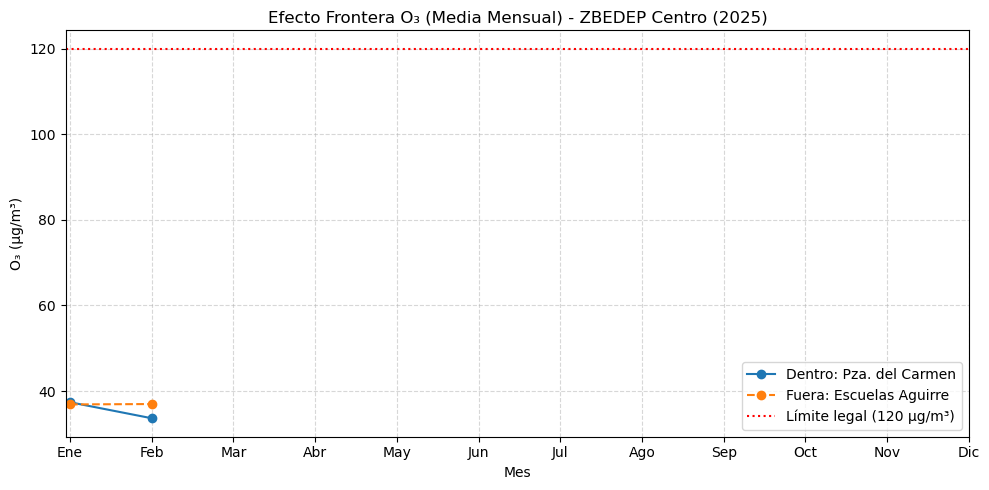


Diferencia media anual entre Plaza del Carmen (dentro) y Escuelas Aguirre (fuera) en 2025: -1.3 µg/m³


In [110]:
# Estaciones a comparar para O3
estacion_dentro = 35  # Plaza del Carmen (ZBEDEP_Centro)
estacion_fuera = 8    # Escuelas Aguirre (Madrid_ZBE)

import matplotlib.pyplot as plt

for anio in anios:
    o3_diario = resultados[anio]['o3_diario']  # Asegúrate de que la clave es correcta
    plt.figure(figsize=(10, 5))

    # Dentro
    datos_dentro = o3_diario[o3_diario['ESTACION'] == estacion_dentro].copy()
    datos_dentro['MES'] = datos_dentro['FECHA'].dt.month
    media_mensual_dentro = datos_dentro.groupby('MES')['O3'].mean()
    plt.plot(media_mensual_dentro.index, media_mensual_dentro.values, marker='o',
             label=f'Dentro: {nombres_estaciones[estacion_dentro]}')

    # Fuera
    datos_fuera = o3_diario[o3_diario['ESTACION'] == estacion_fuera].copy()
    datos_fuera['MES'] = datos_fuera['FECHA'].dt.month
    media_mensual_fuera = datos_fuera.groupby('MES')['O3'].mean()
    plt.plot(media_mensual_fuera.index, media_mensual_fuera.values, marker='o',
             linestyle='--', label=f'Fuera: {nombres_estaciones[estacion_fuera]}')

    # Línea del límite legal
    plt.axhline(y=120, color='r', linestyle=':', label='Límite legal (120 µg/m³)')

    # Configuración del gráfico
    plt.title(f'Efecto Frontera O₃ (Media Mensual) - ZBEDEP Centro ({anio})')
    plt.xlabel('Mes')
    plt.ylabel('O₃ (µg/m³)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                              'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    plt.tight_layout()
    plt.show()

    # Diferencia media anual
    diff_anual = datos_dentro['O3'].mean() - datos_fuera['O3'].mean()
    print(f"\nDiferencia media anual entre Plaza del Carmen (dentro) y Escuelas Aguirre (fuera) en {anio}: {diff_anual:.1f} µg/m³")

Durante el periodo 2020–2025, el análisis multi-anual del O₃ en la frontera de la ZBEDEP Centro muestra que 
las diferencias entre Plaza del Carmen (dentro) y Escuelas Aguirre (fuera) son cada vez menores y tienden a desaparecer. 

Ambos puntos presentan patrones estacionales similares, con máximos en verano y mínimos en invierno, reflejando la 
influencia de factores meteorológicos y regionales sobre el ozono, más que el impacto directo de las restricciones locales al tráfico.

La reducción progresiva de la diferencia anual de O₃ entre ambas estaciones sugiere que las políticas de calidad del aire 
han favorecido una mayor homogeneidad, aunque el comportamiento del ozono sigue estando condicionado por procesos 
fotoquímicos y la dinámica urbana general. No se observan eventos anómalos ni cambios bruscos, lo que refuerza la robustez
de la tendencia observada y la necesidad de abordar el O₃ desde una perspectiva regional y a largo plazo.